#                                                  MASTER OF ENGINEERING / SPÉCIALITÉ: IA
###                                                    PROJET DE FIN DE MODULE 4MLSP
####                                                     Superviseur : Kevin Falk
##### Membre du groupe
    - Kamul Ali Nassoma Wattara
    - Oumou Kanfana
    - Sulayman Fayyaz

###### SUPINFO 2023-2024
    

### Contexte

L'apprentissage machine est une branche de l'IA qui permet de générer de puissants algorithmes utilisées pour optimiser les processus métiers. Ces algorithmes ont une certaine particularité. Ils ne sont pas définis avec les procédures de contrôle usuelles telles que les conditions (Si, Tant que, Pour tout ...) mais basés sur les approches statistiques et la capacité à interpréter les données brutes. 

De ce fait chaque algorithme ou modèle finale neccessite une base de données constituée d'observations pertinentes en regard des objectifs visés et ensuite grace à une bibliothèque prédéfinie de fonction statistiques, on essaie de trouver la meilleure fonction qui traduit au mieux les observations. 

Le résultat le plus pertimment est conservé et utilis pour répondre aux besoins tout en prenant soins de mettre en évidence les limitations du modèle afin de minimiser les erreurs éventuelles. 

### Objectif

Dans ce projet nous allons essayer de trouver des modèles qui répondent à certains besoins basés sur des observations recueillis au cours d'une enquête de satisfaction auprès des clients d'une compagnie aérienne. Nous allons dans un premier temps explorer les données, ensuite les nettoyer et les normaliser, après essayer de trouver les algorithmes de bases idéales pour chaque cas d'usage, puis les entrainer pour essayer de trouver le meilleur modèle. On conclura par un rapport détaillé sur la performance des différents modèles en ce basant sur les métriques comme les scores et métriques adaptés à chaque modèle.


## Analyse exploratoire des données

### Ajout des bibliothèques utiles
#### prérequis : Installé dans un environnement windows ou Linux, les librairies et outils suivants
- Jupyter Notebook (Editor privilégié pour la création de modèle de machine learning avec une interface facile à naviguer)
- Pandas (Librairie Python utiles pour organiser les observations en tables et faire des opérations mathématiques et statistiques)
- Numpy (Librairie Python pour la data science qui est optimisé pour les opérations mathématiques)
- Matplotlib(Librairie Python pour la visualisation des données)
- Seaborn()

Note : Si vous voyez cette page alors c'est que vous avez déjà Jupyter Notebook (^-^)

In [7]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

## Importation des données 

In [8]:
df = pd.read_csv("MP-4MLSP.csv", index_col=0)

## Description générale du dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129754 non-null  float64
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  float64
 7   Inflight wifi service              129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Ease of Online booking             129749 non-null  float64
 10  Gate location                      129750 non-null  float64
 11  Food and drink                     129880 no

### Conclusion préliminaire
+ Nous avons un dataset de 129880 observations.
  + Chaque observation est associé à 25 catégories ou caractéristiques nommées "Features" en anglais
+ Nous avons les colonnes comme:
  + Age
  + Ease of Online booking
  + Gate location
  + Leg room service
  + Arrival Delay in Minutes
   qui contiennent des valeurs nulles ou manquantes
+ Les types des caractéristiques correspondent aux valeurs renseignés dans les colonnes. 


### Suppresion de la colonne "id"
Cette colonne en tant que numéro d'ordre n'est pas du tout pertinent pour le modèle de prédiction, elle ne constitue pas une caractéristique des observations.

In [10]:
try :
    df.drop(columns="id",inplace=True)  
except:
    pass

In [11]:
print("\nVérification après suppression de l'id: \n")
df.head(1)


Vérification après suppression de l'id: 



,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Price
0,Female,disloyal Customer,19.0,Business travel,Eco,353.0,3,4,3.0,4.0,...,5,5.0,5,2,2,2,0,3.0,dissatisfied,565


## Analyse descriptive des données
Nous allons réaliser des tests statistiques  de dépendance et determiner si oui ou non ces variables suivent une loi de distribution afin de trouver la procédure adéquate permettant de gérer les valeurs manquantes en vue d'améliorer les scores.

### Les données numériques 

In [12]:

num_columns = []
print("\nApercu générale des données numériques\n")

for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        num_columns.append(column)
print("Nombre de colonne: ",len(num_columns))
i= 0
for val in num_columns:
    if i ==0:
        print("")
    i+=1
    print(f"- {val}", sep=" ", end="\t")
    if i == 3:
        i=0
        

print("\n\n")


Apercu générale des données numériques

Nombre de colonne:  19

- Age	- Flight Distance	- Inflight wifi service	
- Departure/Arrival time convenient	- Ease of Online booking	- Gate location	
- Food and drink	- Online boarding	- Seat comfort	
- Inflight entertainment	- On-board service	- Leg room service	
- Baggage handling	- Checkin service	- Inflight service	
- Cleanliness	- Departure Delay in Minutes	- Arrival Delay in Minutes	
- Price	




#### Distribution des données 

In [13]:
only_one_value =[]
feature_with_unique_value = []
ordinal_feature =[]
for col in num_columns:
    if col != "Price":
        counts = df[col].value_counts()
       
        for v in counts.keys():
            if counts[v] == 1:
                only_one_value.append((col,v,counts[v]))
                if col not in feature_with_unique_value:
                    feature_with_unique_value.append(col)
                
                if np.max(df[col]) ==5:
                    if col not in ordinal_feature:
                        ordinal_feature.append(col)

print("\n\nNumber of unique value: ",len(only_one_value))
print("Feature with unique value")
print(feature_with_unique_value)
print("\nNumber of ordinal feature",len(ordinal_feature))
print("Ordinal feature:",ordinal_feature)
print("\nList of unique value")
print("\n",only_one_value)
    



Number of unique value:  312
Feature with unique value
['Flight Distance', 'Gate location', 'Seat comfort', 'Checkin service', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

Number of ordinal feature 3
Ordinal feature: ['Gate location', 'Seat comfort', 'Checkin service']

List of unique value

 [('Flight Distance', 144.0, 1), ('Flight Distance', 880.0, 1), ('Flight Distance', 356.0, 1), ('Flight Distance', 1432.0, 1), ('Flight Distance', 1037.0, 1), ('Flight Distance', 1343.0, 1), ('Flight Distance', 1497.0, 1), ('Flight Distance', 1536.0, 1), ('Flight Distance', 1345.0, 1), ('Flight Distance', 1626.0, 1), ('Flight Distance', 1577.0, 1), ('Flight Distance', 1572.0, 1), ('Flight Distance', 1007.0, 1), ('Flight Distance', 431.0, 1), ('Flight Distance', 1557.0, 1), ('Flight Distance', 976.0, 1), ('Flight Distance', 996.0, 1), ('Flight Distance', 1312.0, 1), ('Flight Distance', 1440.0, 1), ('Flight Distance', 438.0, 1), ('Flight Distance', 1156.0, 1), ('Flight Distance', 440.

#### Conclusion 

Nous avons 6 variables qui comportent dans l'ensemble 312 éléments sous représentés. 

+ Les impacts de cette sous représentation sur le modèle seront les suivants:
  + Risque d'erreur lors de la transformation du jeux de données test si jamais parmi ces variables il y a des variables ordinales qui n'ont pas été pris en compte lors de la répartition du train test split.
  +  Risque d'avoir un modèle biaisé car n'ayant pas été entrainé sur un échantillon assez representative des données. 

#### Détection des valeurs abhérantes numériques 

In [14]:
# Extraction des colonnes numériques du dataframe
num_df = df[num_columns]
num_df.head(1)

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Price
0,19.0,353.0,3,4,3.0,4.0,2,3,2,2,5,5.0,5,2,2,2,0,3.0,565


Apercu général des données


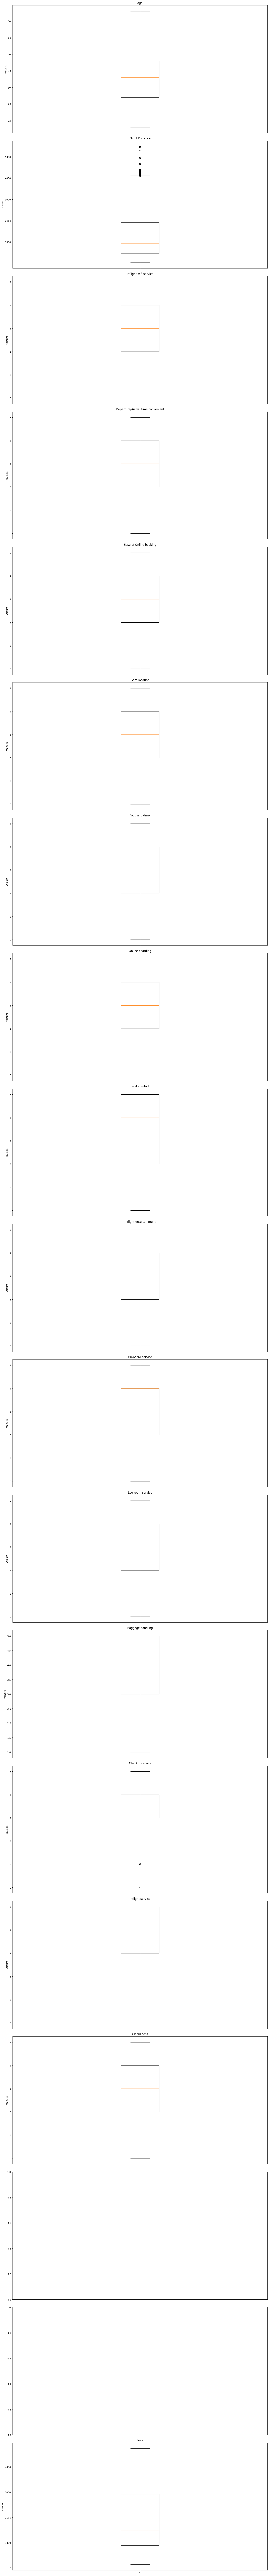

In [15]:
print("Apercu général des données")
# Calcul du nombre de lignes nécessaire en fonction du nombre de colonnes
num_rows = len(num_df.columns) 

# Création de la figure et des sous-graphiques
fig, axis = plt.subplots(nrows=num_rows, ncols=1, figsize=(16, 8*num_rows),sharex=True)

# Parcours de chaque colonne du DataFrame
for i, column in enumerate(num_df.columns):
    
    # Sélection du sous-graphique correspondant à la colonne
    ax = axis[i]
    # Extraction des données non null pour gérer l'affichage du boxplot dans matplotlib
    if column not in ["Departure Delay in Minutes",	"Arrival Delay in Minutes"]:
        clean_df = num_df[column].dropna()
        # Création du boxplot pour la colonne actuelle
        ax.boxplot(clean_df)
        
        # Ajout du titre et de l'étiquette de l'axe y pour chaque subplot
        ax.set_title(column)
        ax.set_ylabel('Valeurs')


# Réglage de l'espacement entre les sous-graphiques
plt.tight_layout()

# Affichage de la figure
plt.show()

Apercu général des données


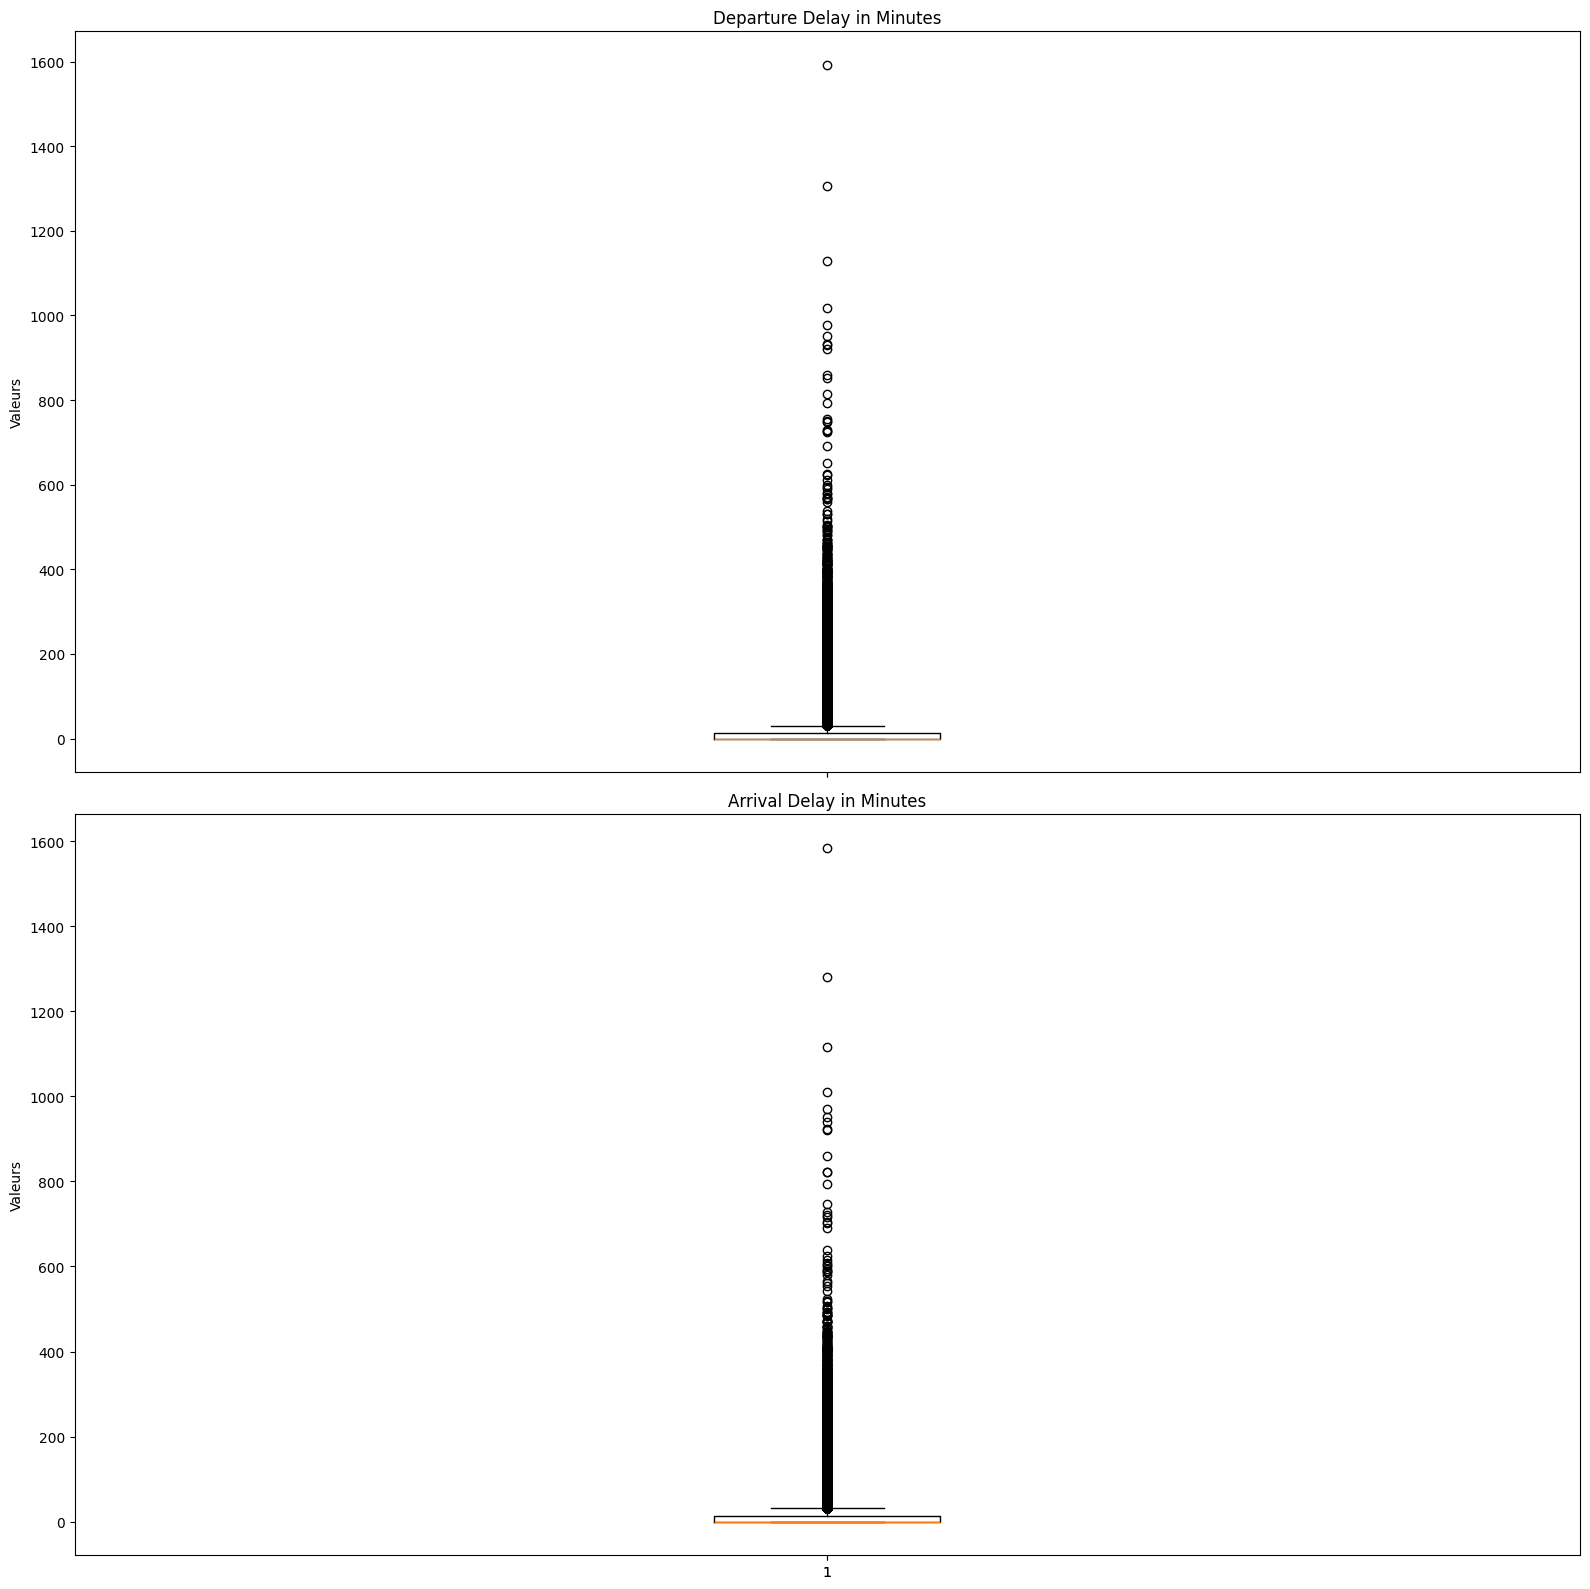

In [16]:
print("Apercu général des données")


# Création de la figure et des sous-graphiques
fig, axis = plt.subplots(nrows=2, ncols=1, figsize=(16, 16),sharex=True)
columns = ["Departure Delay in Minutes",	"Arrival Delay in Minutes"]
# Parcours de chaque colonne du DataFrame
for i, column in enumerate(columns):
    
    # Sélection du sous-graphique correspondant à la colonne
    ax = axis[i]
    # Extraction des données non null pour gérer l'affichage du boxplot dans matplotlib
    
    clean_df = num_df[column].dropna()
    # Création du boxplot pour la colonne actuelle
    ax.boxplot(clean_df)
    
    # Ajout du titre et de l'étiquette de l'axe y pour chaque subplot
    ax.set_title(column)
    ax.set_ylabel('Valeurs')

# Réglage de l'espacement entre les sous-graphiques
plt.tight_layout()

# Affichage de la figure
plt.show()

##### Conclusion:
Nous avons des données catégoriels ordinales parmi les variables numériques
IL y a des valeurs abherantes qu'il faudra traiter par la suite dans les colonnes : ["Flight Distance","Arrival Delay in Minutes","Departure Delay in Minutes",]

#### Matrix de correlation entre la variable numériques

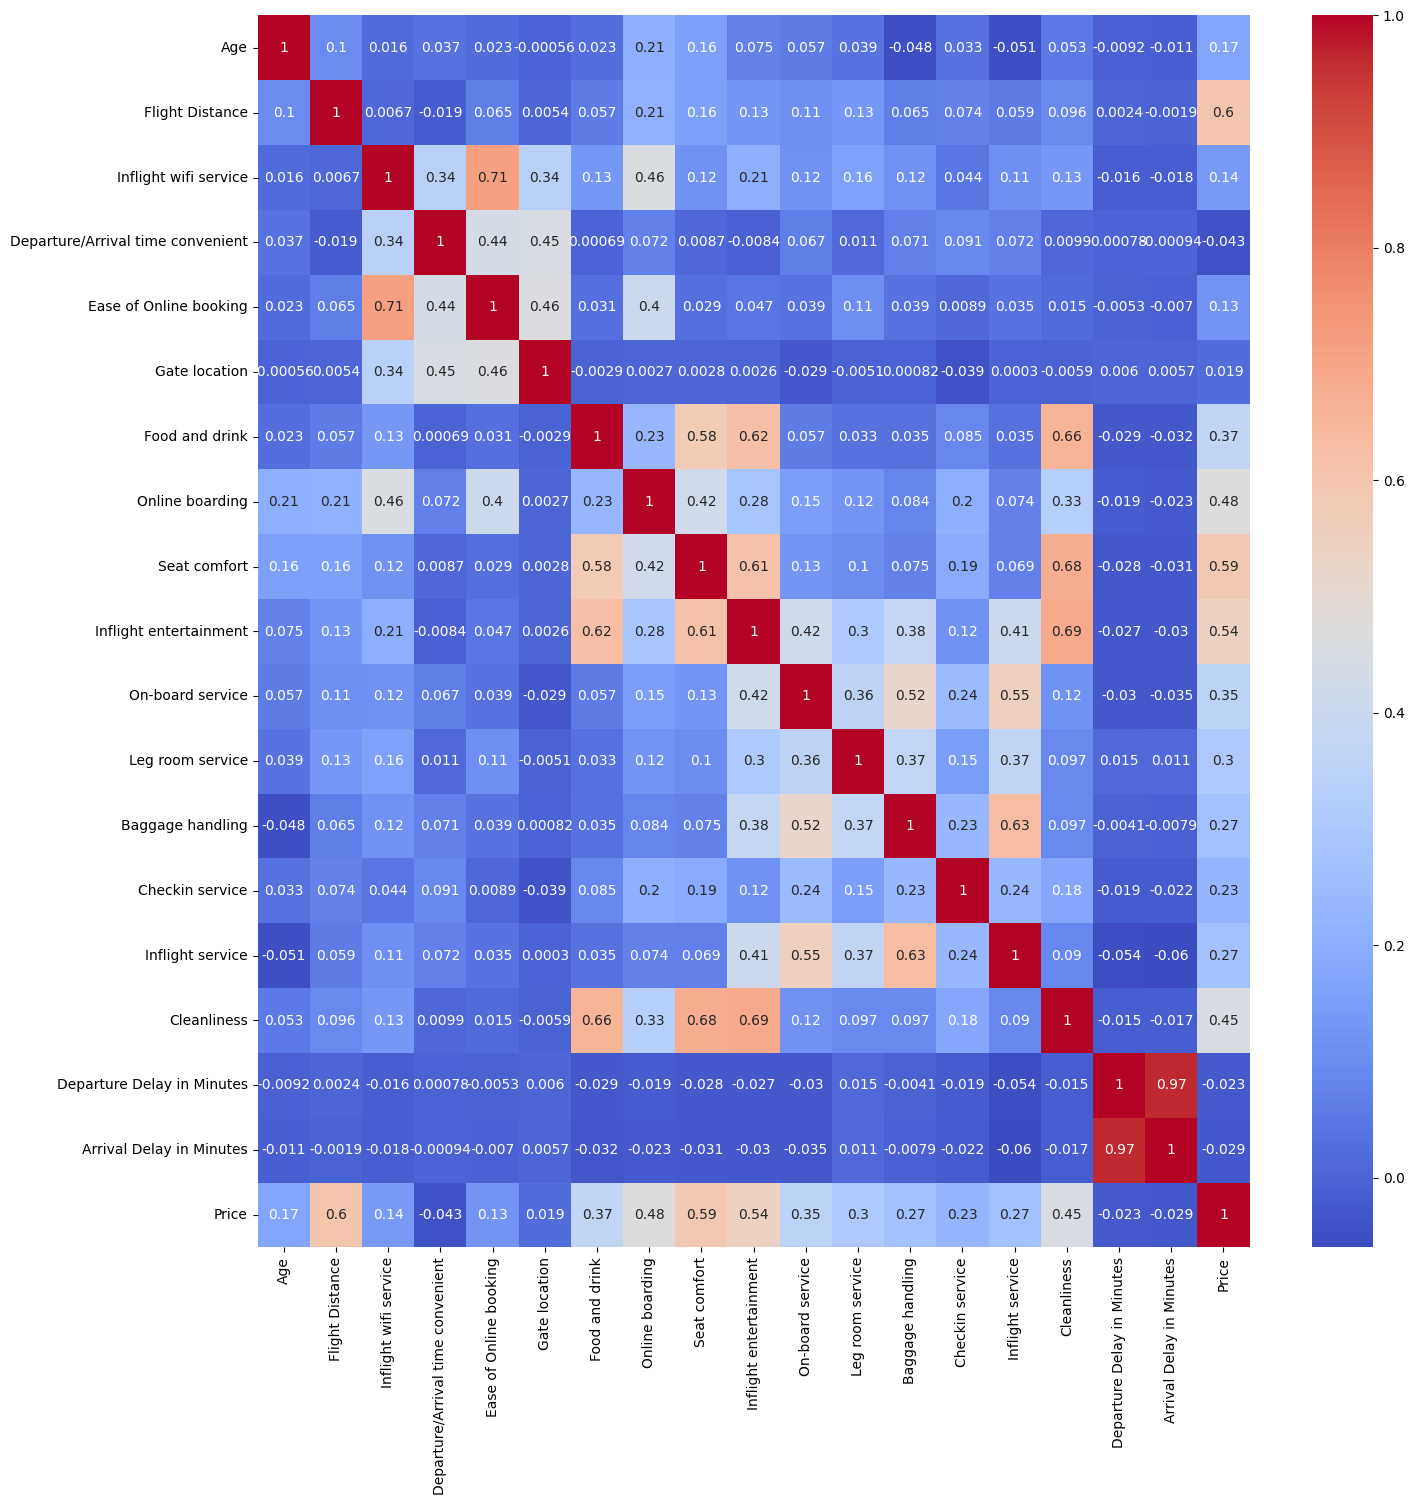

In [17]:

# # Corrélation entre les variables numériques
plt.figure(figsize=(16, 16))

correlation_matrix = df[num_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm' )

plt.gca().set_aspect('auto')

# Show the plot
plt.show()

#### Conclusion 
Les variables numériques sont indépendants les unes des autres sauf "Arrival Delay in Minutes" and "Departure Delay in Minutes"
- Dans la suite nous allons analyser leur influence sur la performance du modèle.

#### Détection des distributions suivants la loi normale

Aperçu générale des histogrammes


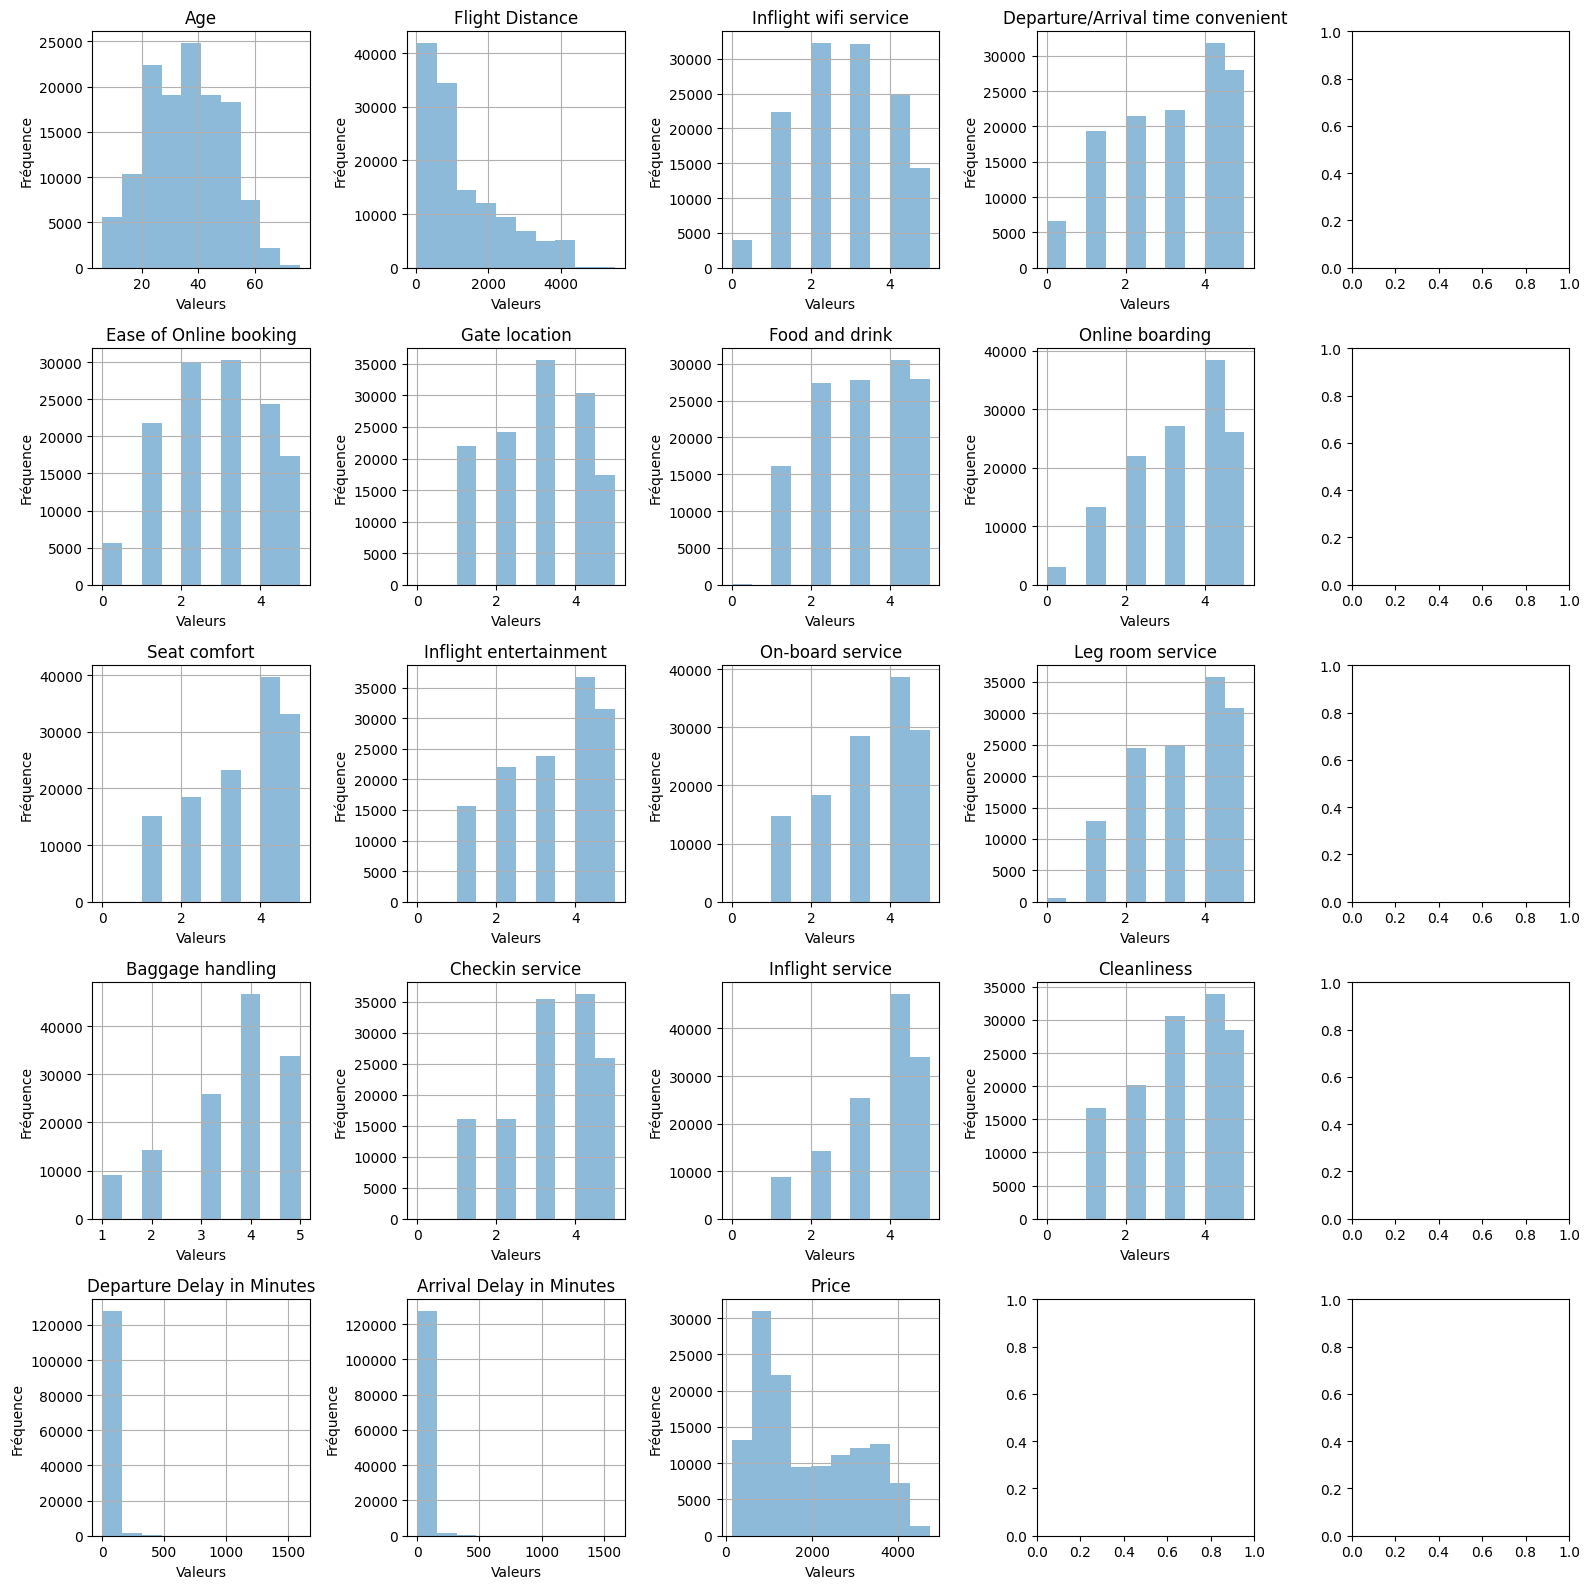

In [18]:

print("Aperçu générale des histogrammes")
fig, axis = plt.subplots(nrows=5, ncols=5, figsize=(16, 16))

# Affichage des histogrammes des colonnes numériques
i=0
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
       
        ax = axis[i // 4, i % 4]  # Sélection du sous-graphique
        df[column].hist(ax=ax, alpha=0.5)
        ax.set_title(column)
        ax.set_xlabel('Valeurs')
        ax.set_ylabel('Fréquence')
        ax.grid(True)
        i+=1

# Réglage de l'espacement entre les sous-graphiques
plt.tight_layout()

# Affichage de la figure
plt.show()

####  Restriction aux colonnes comportant des valeurs manquantes

In [19]:
has_nan_num_columns = ["Age", "Ease of Online booking", "Gate location", "Leg room service", "Arrival Delay in Minutes"]

Apercu générale des histogrammes pour les données comportant des valeurs manquantes


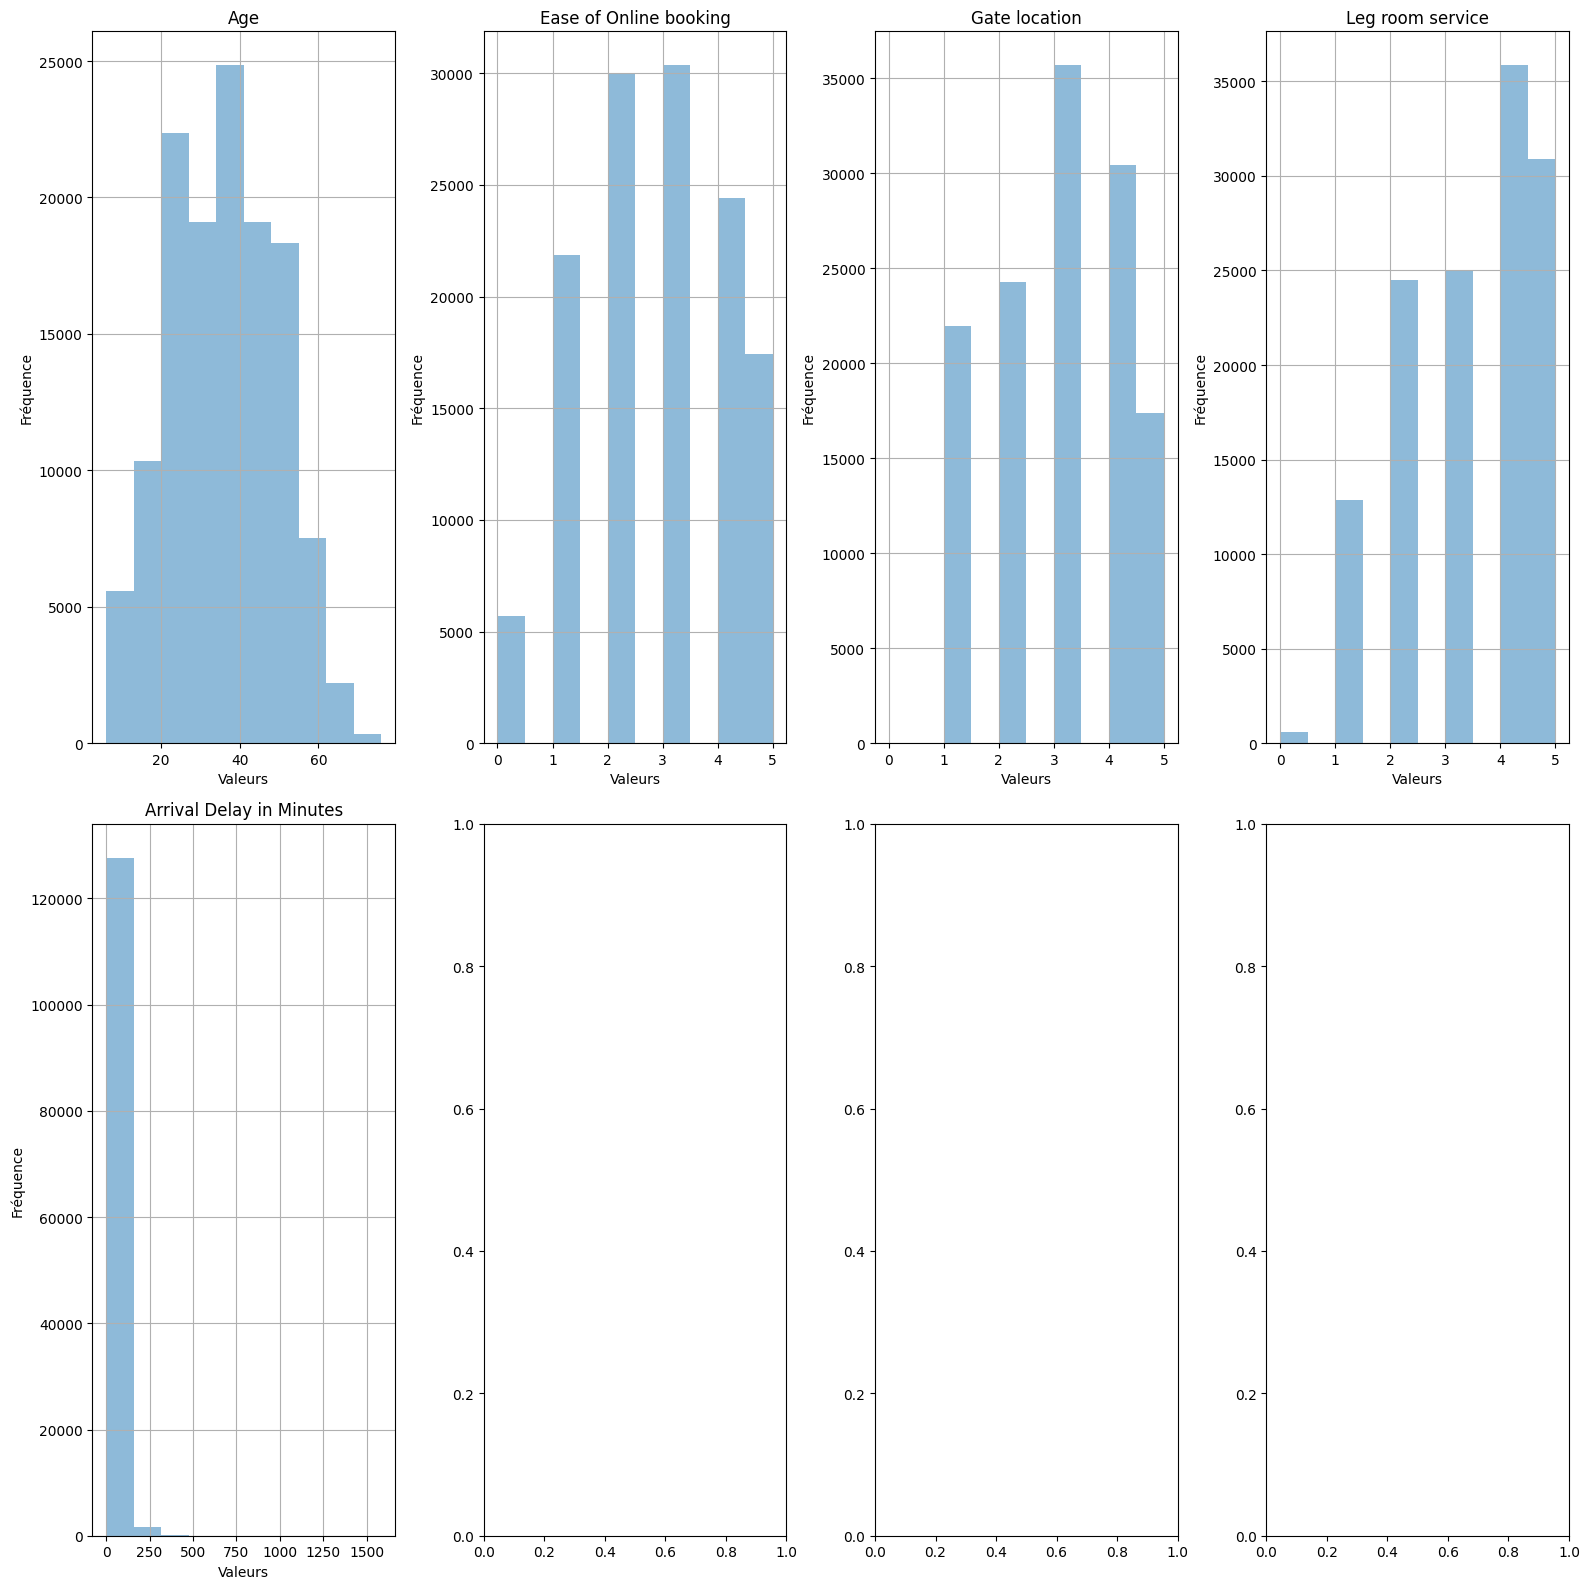

In [20]:
print("Apercu générale des histogrammes pour les données comportant des valeurs manquantes")
fig, axis = plt.subplots(nrows=2, ncols=4, figsize=(16, 16))

# Affichage des histogrammes des colonnes numériques
i=0
for column in df.columns:
    
    if df[column].dtype in ['int64', 'float64'] and column in has_nan_num_columns:
      
        ax = axis[i // 4, i % 4]  # Sélection du sous-graphique
        df[column].hist(ax=ax, alpha=0.5)
        ax.set_title(column)
        ax.set_xlabel('Valeurs')
        ax.set_ylabel('Fréquence')
        ax.grid(True)
        i+=1

# Réglage de l'espacement entre les sous-graphiques
plt.tight_layout()

# Affichage de la figure
plt.show()

#### Vérifions si les variables suivent une loi de probabilité en dessinant la courbe de densité

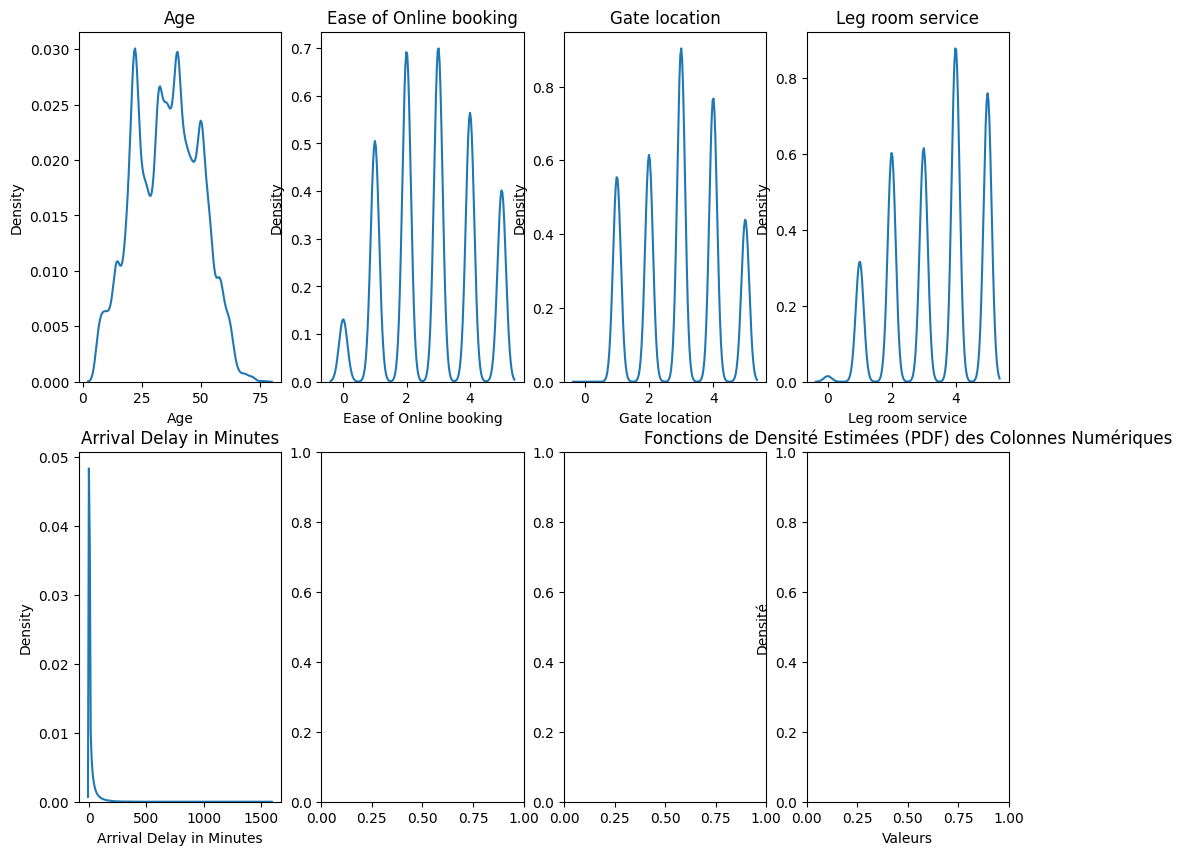

In [21]:
fig, axis = plt.subplots(nrows=2, ncols=4, figsize=(12, 10))

axis = axis.flatten()
i=0
for column in df.columns:
    
    if df[column].dtype in ['int64', 'float64'] and column in has_nan_num_columns:

        sns.kdeplot(data=df[column], ax=axis[i])
        axis[i].set_title(column)
        i+=1

plt.title('Fonctions de Densité Estimées (PDF) des Colonnes Numériques')
plt.xlabel('Valeurs')
plt.ylabel('Densité')
plt.show()

#### Test de normalité

##### Shapiro-Wilk

In [22]:
from scipy.stats import shapiro


In [23]:
alpha = 0.05
for column in df.columns:
    
    if df[column].dtype in ['int64', 'float64'] and column in has_nan_num_columns:
        clean_column = df[column].dropna()
        # print(clean_column)
        stat, p_value = shapiro(clean_column)

        # Interprétation du test
        if p_value > alpha:
            print(f"La distribution de la variable {column} semble suivre une loi normale {p_value}")
        else:
            print(f"La distribution de la variable {column} ne semble pas suivre une loi normale  {p_value}")

La distribution de la variable Age ne semble pas suivre une loi normale  5.819309998288903e-66
La distribution de la variable Ease of Online booking ne semble pas suivre une loi normale  1.086472259957553e-107
La distribution de la variable Gate location ne semble pas suivre une loi normale  1.6051974361919483e-115
La distribution de la variable Leg room service ne semble pas suivre une loi normale  4.627860325713885e-119
La distribution de la variable Arrival Delay in Minutes ne semble pas suivre une loi normale  2.6111827542956695e-172


c:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 129754.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 129749.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 129750.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not b

##### Conclusion
A cause de la fiabilité du test de shapiro sur les données, nous voulons valider la distribution en faisant d'autres test complémentaire.

##### Kolmogorov–Smirnov 
A cause de la fiabilité du test de shapiro sur les données, nous voulons valider la distribution en faisant d'autres test complémentaire.

In [24]:
from scipy import stats

In [25]:
alpha = 0.05
for column in df.columns:
    
    if df[column].dtype in ['int64', 'float64'] and column in has_nan_num_columns:

        clean_column = df[column].dropna()
        statistic, p_value = stats.kstest(clean_column,  stats.norm.cdf)
        

        # Interprétation du test
        if p_value > alpha:
            print(f"La distribution de la variable {column} semble suivre une loi normale (p-value=%.4f)" % p_value)
        else:
            print(f"La distribution de la variable {column} ne semble pas suivre une loi normale (p-value=%.4f)" % p_value)

La distribution de la variable Age ne semble pas suivre une loi normale (p-value=0.0000)
La distribution de la variable Ease of Online booking ne semble pas suivre une loi normale (p-value=0.0000)
La distribution de la variable Gate location ne semble pas suivre une loi normale (p-value=0.0000)
La distribution de la variable Leg room service ne semble pas suivre une loi normale (p-value=0.0000)
La distribution de la variable Arrival Delay in Minutes ne semble pas suivre une loi normale (p-value=0.0000)


##### Conclusion 
Les données des colonnes ci dessus ne suivent pas une distribution normale

#### Vérification de l'indépendance entre les valeurs
Nous allons comparer des nuages les données entre eux pour voir s'il existe une relation entre la distance et le prix, ou l'age et le prix

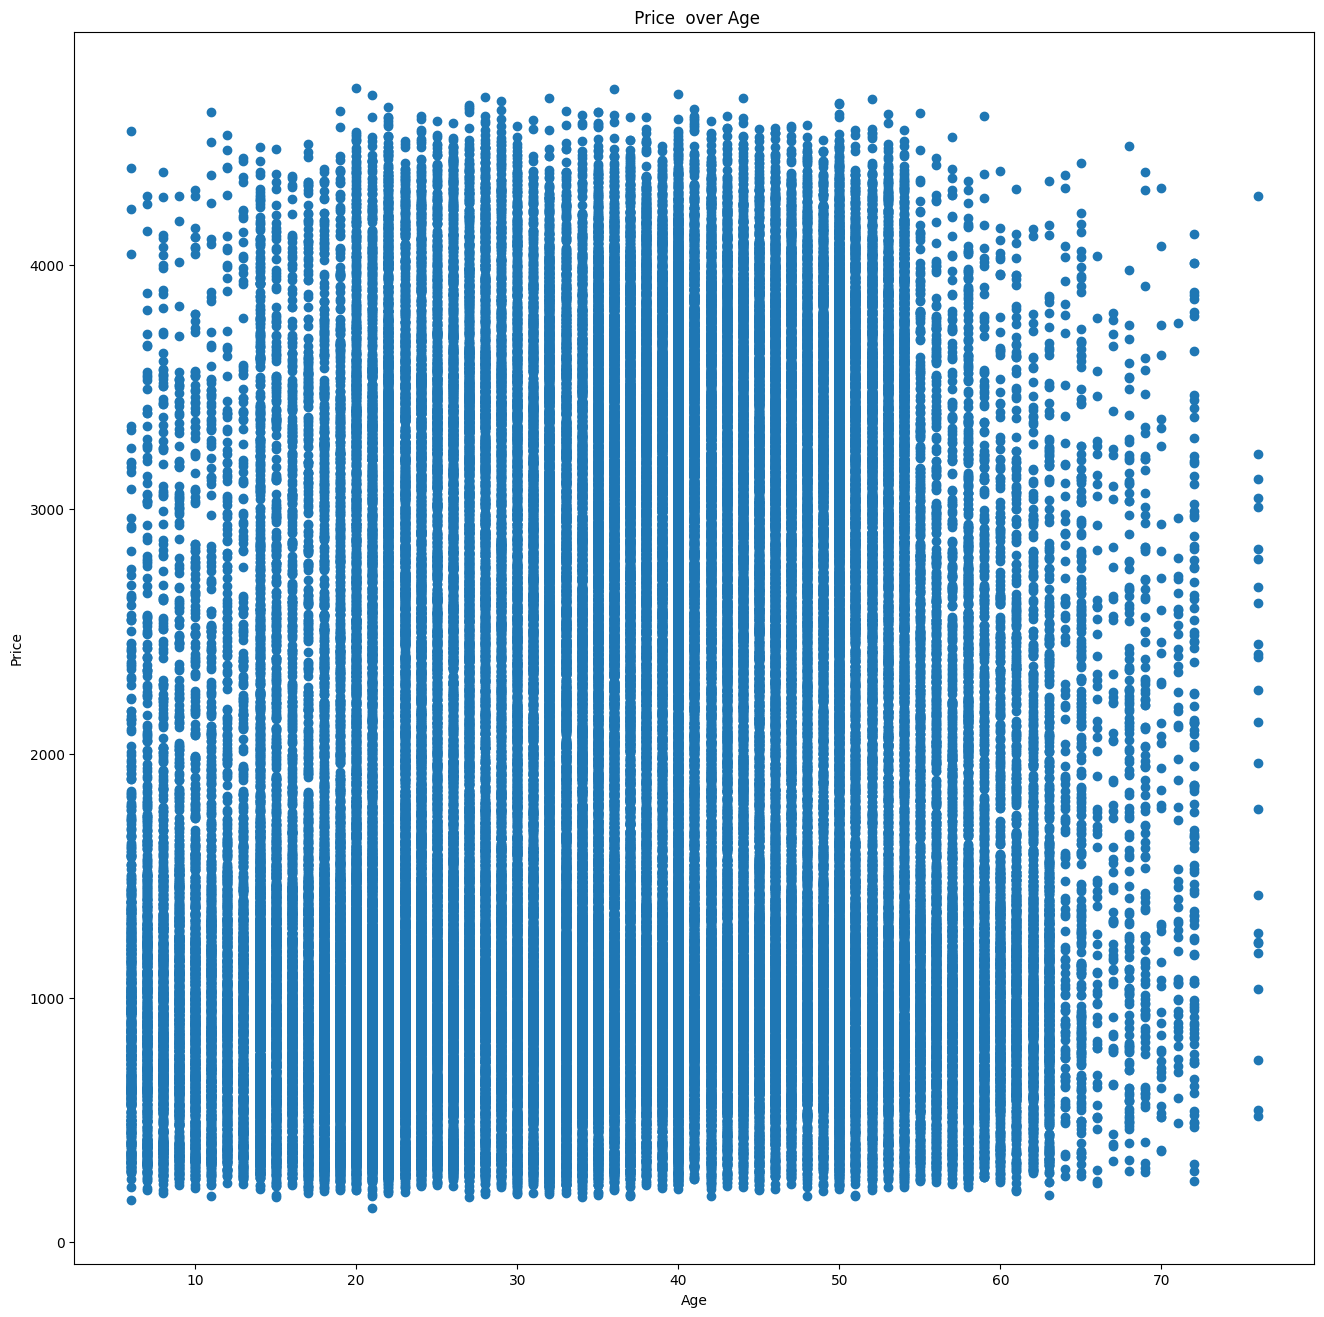

In [26]:


fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(16, 16))

# Affichage des scatter plot

plt.scatter(num_df.Age,num_df.Price)
plt.xlabel("Age")
plt.ylabel("Price")
# Réglage de l'espacement entre les sous-graphiques

plt.title(" Price  over Age")
# Affichage de la figure
plt.show()

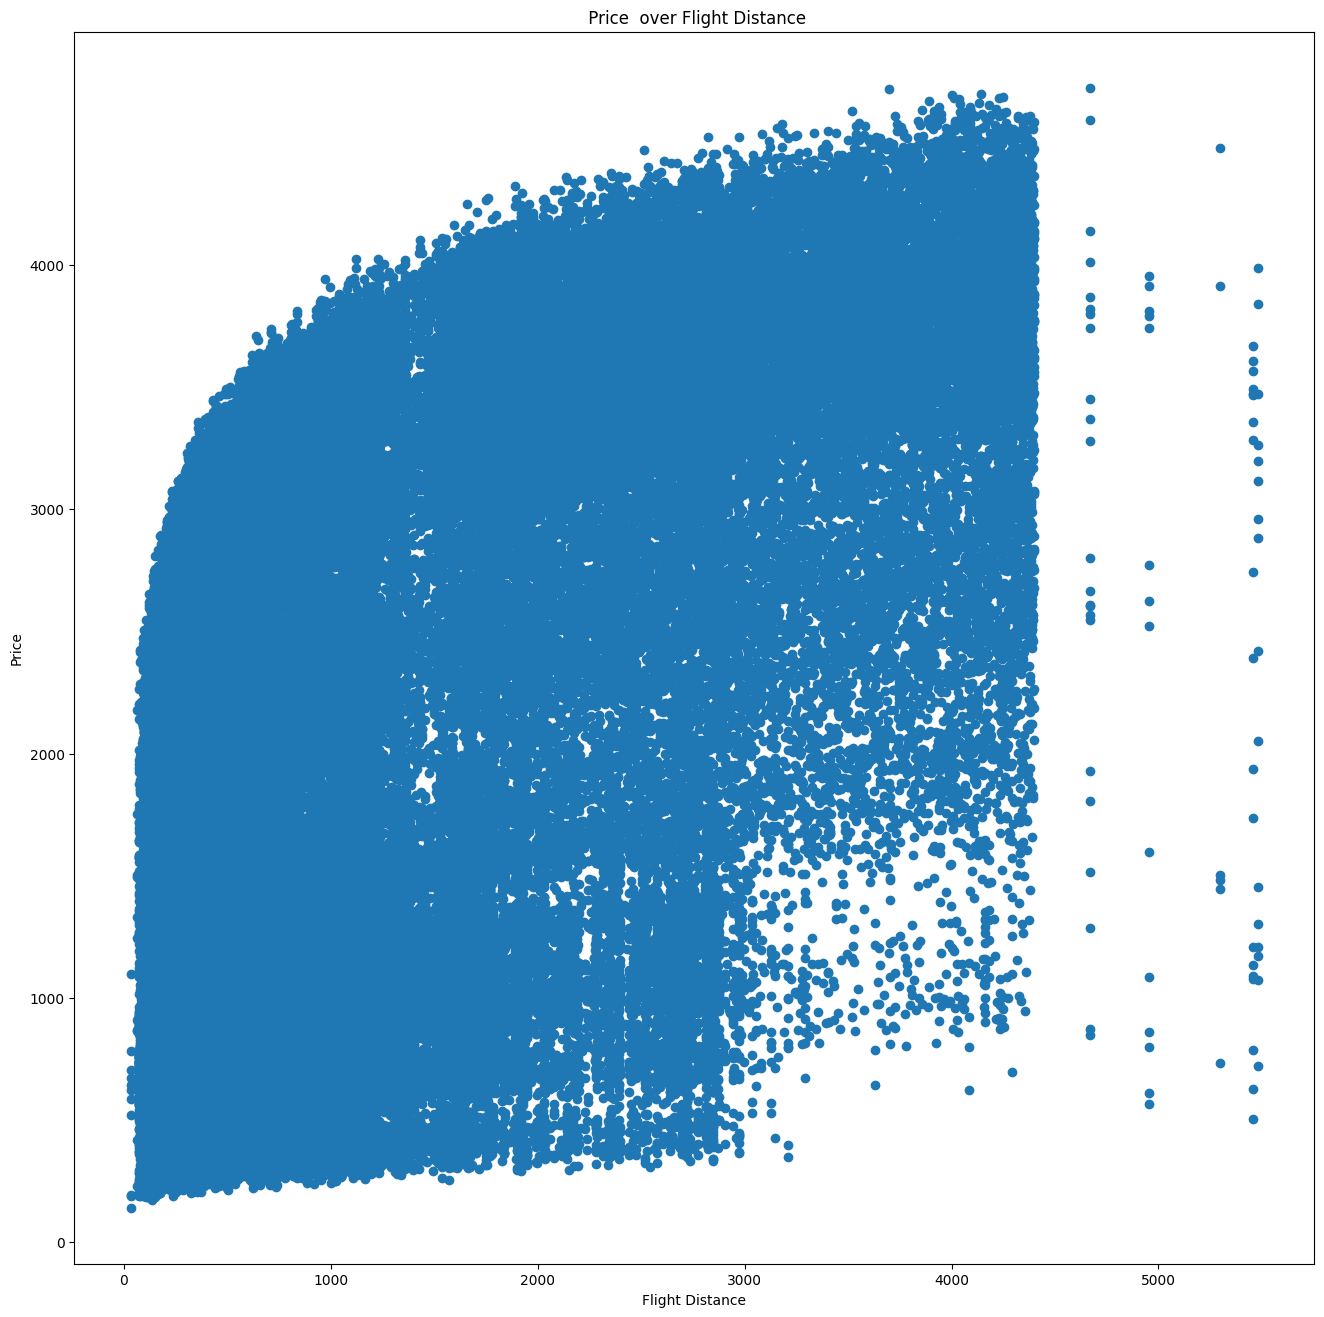

In [27]:


fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(16, 16))

# Affichage des scatter plot

plt.scatter(num_df["Flight Distance"],num_df.Price)
plt.xlabel("Flight Distance")
plt.ylabel("Price")
# Réglage de l'espacement entre les sous-graphiques

plt.title(" Price  over Flight Distance")
# Affichage de la figure
plt.show()

##### Conclusion 
Pas de corelation évidente entre le prix du vol et l'age ni la distance

### Les données catégorielles

#### Distribution des données


In [28]:
cat_columns = []
print("Apercu générale des données catégorieles")

# Affichage des données catégorieles
i=0
for column in df.columns:
    if df[column].dtype not in ['int64', 'float64']:
        cat_columns.append(column)
print(cat_columns)

Apercu générale des données catégorieles
['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']


In [29]:
cat_df = df[cat_columns]

for col in cat_df.columns:
    print(f"{col}: { cat_df[col].describe()} \n")

Gender: count     129880
unique         2
top       Female
freq       65899
Name: Gender, dtype: object 

Customer Type: count             129880
unique                 2
top       Loyal Customer
freq              106100
Name: Customer Type, dtype: object 

Type of Travel: count              129880
unique                  2
top       Business travel
freq                89693
Name: Type of Travel, dtype: object 

Class: count       129880
unique           3
top       Business
freq         62160
Name: Class, dtype: object 

satisfaction: count        129880
unique            3
top       satisfied
freq          56428
Name: satisfaction, dtype: object 



C:\Users\Administrateur\AppData\Local\Temp\ipykernel_18484\520706482.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\Administrateur\AppData\Local\Temp\ipykernel_18484\520706482.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\Administrateur\AppData\Local\Temp\ipykernel_18484\520706482.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\Administrateur\AppData\Local\Temp\ipykernel_18484\520706482.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xtickla

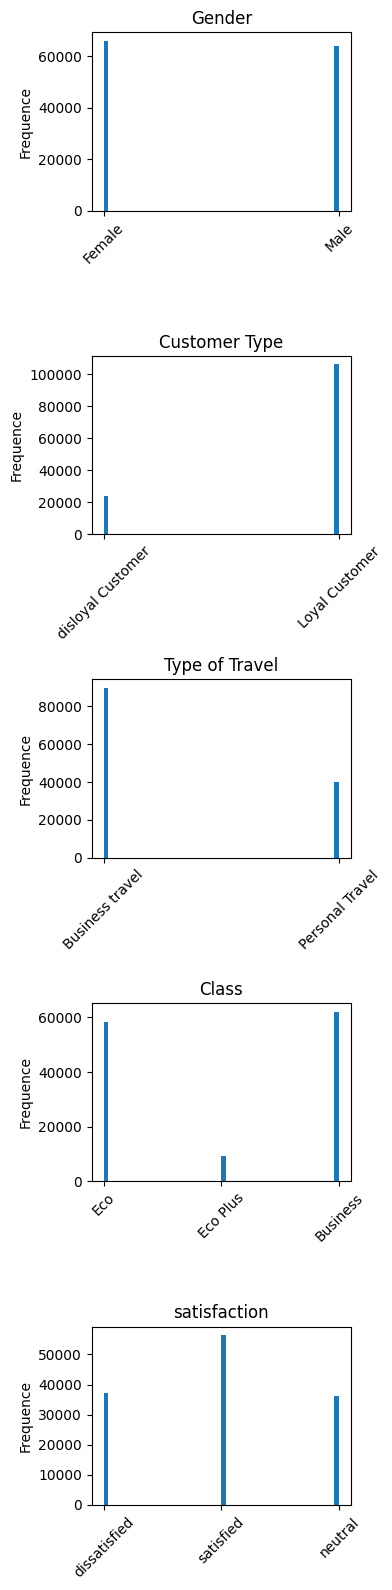

In [30]:
num_rows = (len(cat_df.columns) + 1) // 2

# Création de la figure et des sous-graphiques
fig, axis = plt.subplots(nrows=5, ncols=1, figsize=(4, 16))

# Parcours de chaque colonne du DataFrame
for i, column in enumerate(cat_df.columns):
    # Calcul des coordonnées du subplot
    row = i 
    # Sélection du sous-graphique correspondant à la colonne
    ax = axis[row]
    # Extraction des données non null pour gérer l'affichage du boxplot dans matplotlib
    clean_df = cat_df[column].dropna()
    # Création du boxplot pour la colonne actuelle
    ax.hist(clean_df, bins=50)
    
    # Ajout du titre et de l'étiquette de l'axe y pour chaque subplot
    ax.set_title(column)
    
    ax.set_ylabel('Frequence')

    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
# Réglage de l'espacement entre les sous-graphiques
plt.tight_layout()
# Affichage de la figure
plt.show()

#### Analyse des données basé sur les relations entre la variable cible "Satisfaction" et les variables descriptives

##### Detection des valeurs abherantes

<Axes: xlabel='satisfaction', ylabel='Age'>

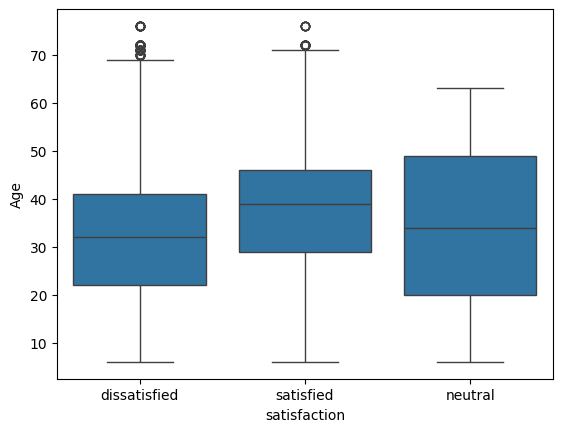

In [31]:
sns.boxplot(x='satisfaction', y='Age', data=df)

<Axes: xlabel='satisfaction', ylabel='Flight Distance'>

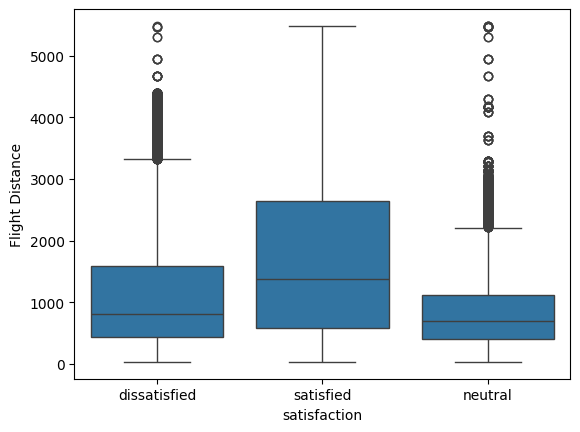

In [32]:
sns.boxplot(x='satisfaction', y='Flight Distance', data=df)


##### Conclusion
Les valeurs abherantes sont explicables par le manque de representativité dans certains intervalles et non À cause des mauvaises données. La tendance générale est à la satistaction sur les vols de durée supérieur À 1500 miles et pour une tranche d'age auour de 40 ans.

##### Analyse de la satisfaction suivant le sexe

<Axes: xlabel='Gender', ylabel='count'>

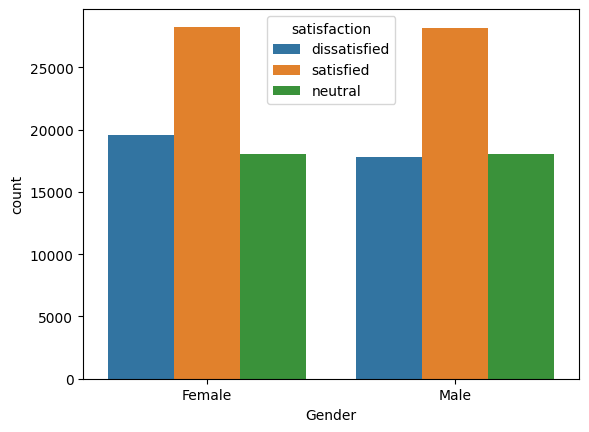

In [33]:
# Visualisation des variables catégorielles en fonction de la satisfaction
sns.countplot(x='Gender', hue='satisfaction', data=df)


##### Conclusion
Il en ressort que les femmes sont légèrement moins satisfaites que les hommes 

##### Analyse de la satisfaction suivant le type de client

<Axes: xlabel='Customer Type', ylabel='count'>

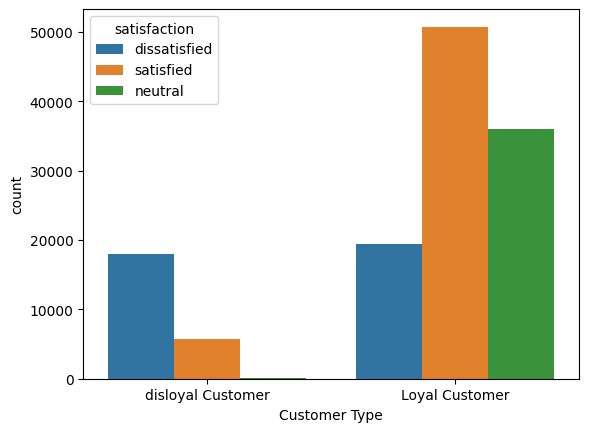

In [34]:
sns.countplot(x='Customer Type', hue='satisfaction', data=df)



##### Conclusion
Il en ressort qu'en moyenne les personnes réguliers sont généralement plus satisfaites que les autres 

##### Table de contingence entre la satisfaction et la class 

In [35]:
sc_cont_table = pd.crosstab(cat_df.satisfaction,cat_df.Class)
sc_cont_table


Class,Business,Eco,Eco Plus
satisfaction,,,
dissatisfied,16643,17727,2979
neutral,2351,29639,4113
satisfied,43166,10943,2319


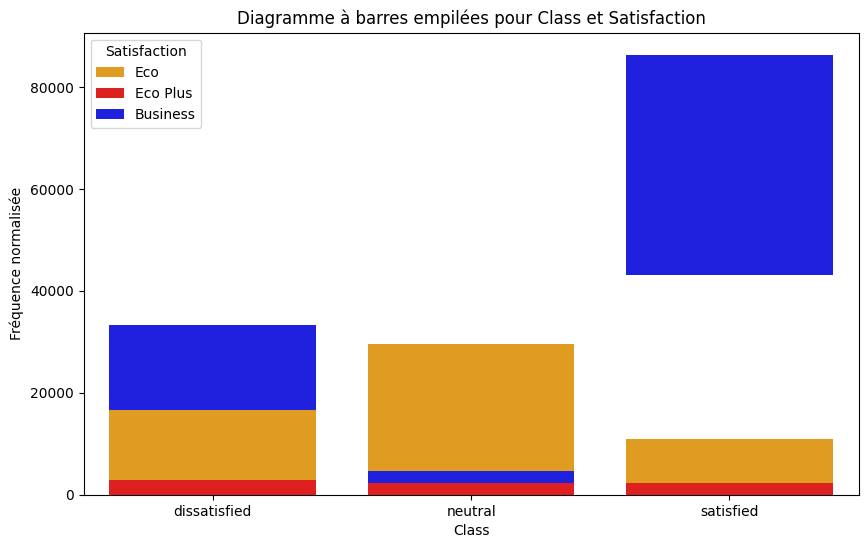

In [36]:
plt.figure(figsize=(10, 6))
sns.barplot(data=sc_cont_table.reset_index(), x='satisfaction', y='Eco', color='orange', label='Eco')
sns.barplot(data=sc_cont_table.reset_index(), x='satisfaction', y='Eco Plus', color='red', label='Eco Plus')
sns.barplot(data=sc_cont_table.reset_index(), x='satisfaction', y='Business', color='blue', label="Business" ,bottom=sc_cont_table['Business'])
plt.title('Diagramme à barres empilées pour Class et Satisfaction')
plt.xlabel('Class')
plt.ylabel('Fréquence normalisée')
plt.legend(title='Satisfaction')
plt.show()

##### Test d'independance

##### Satisfaction et Class

In [37]:
from scipy.stats import chi2_contingency

# Contengency table
contingency_table =  pd.crosstab(cat_df.satisfaction,cat_df.Class)

print("Table de contingence pour Class et Satisfaction:")
print(contingency_table)

# Test d'indépendance du khi-deux
chi2, p, ddl, freq = chi2_contingency(contingency_table)

print("\nRésults of khi-deux test ")
print("\nStatistic Chi-Square", chi2)
print("\n p-value", p)
print("\nFreedom Degree", ddl)
print("\nExpected Frequencies Table")
print(freq)

# Conclusion
alpha = 0.05
print("\n\nConclusion :")
if p < alpha:
    print("We reject (H0)  'Satisfaction' and 'Class' sont liées.\n")
else:
    print("We can't reject (H0) 'Satisfaction ' and 'Class' ne sont pas sont liées.\n")

Table de contingence pour Class et Satisfaction:
Class         Business    Eco  Eco Plus
satisfaction                           
dissatisfied     16643  17727      2979
neutral           2351  29639      4113
satisfied        43166  10943      2319

Résults of khi-deux test 

Statistic Chi-Square 43659.4207261424

 p-value 0.0

Freedom Degree 4

Expected Frequencies Table
[[17875.06806283 16767.65353403  2706.27840314]
 [17278.73791192 16208.26783954  2615.99424854]
 [27006.19402525 25333.07862642  4088.72734832]]


Conclusion :
We reject (H0)  'Satisfaction' and 'Class' sont liées.



##### Satisfaction et type de voyage

In [38]:
from scipy.stats import chi2_contingency

# Contengency table
contingency_table =  pd.crosstab(cat_df.satisfaction,cat_df["Type of Travel"])

print("Table de contingence pour Class et Satisfaction:")
print(contingency_table)

# Test d'indépendance du khi-deux
chi2, p, ddl, freq = chi2_contingency(contingency_table)

print("\nRésults of khi-deux test ")
print("\nStatistic Chi-Square", chi2)
print("\n p-value", p)
print("\nFreedom Degree", ddl)
print("\nExpected Frequencies Table")
print(freq)

# Conclusion
alpha = 0.05
print("\n\nConclusion :")
if p < alpha:
    print("We reject (H0)  'Satisfaction' and 'Type of Travel' sont liées.\n")
else:
    print("We can't reject (H0) 'Satisfaction ' and 'Type of Travel ne sont pas sont liées.\n")

Table de contingence pour Class et Satisfaction:
Type of Travel  Business travel  Personal Travel
satisfaction                                    
dissatisfied              37337               12
neutral                       0            36103
satisfied                 52356             4072

Résults of khi-deux test 

Statistic Chi-Square 112142.32258998678

 p-value 0.0

Freedom Degree 2

Expected Frequencies Table
[[25792.60746073 11556.39253927]
 [24932.14027564 11170.85972436]
 [38968.25226363 17459.74773637]]


Conclusion :
We reject (H0)  'Satisfaction' and 'Type of Travel' sont liées.



##### Satisfaction et type de client

In [39]:
from scipy.stats import chi2_contingency

# Contengency table
contingency_table =  pd.crosstab(cat_df.satisfaction,cat_df["Customer Type"])

print("Table de contingence pour Class et Satisfaction:")
print(contingency_table)

# Test d'indépendance du khi-deux
chi2, p, ddl, freq = chi2_contingency(contingency_table)

print("\nRésults of khi-deux test ")
print("\nStatistic Chi-Square", chi2)
print("\n p-value", p)
print("\nFreedom Degree", ddl)
print("\nExpected Frequencies Table")
print(freq)

# Conclusion
alpha = 0.05
print("\n\nConclusion :")
if p < alpha:
    print("We reject (H0)  'Satisfaction' and 'Customer Type' sont liées.\n")
else:
    print("We can't reject (H0) 'Satisfaction ' and 'Customer Type ne sont pas sont liées.\n")

Table de contingence pour Class et Satisfaction:
Customer Type  Loyal Customer  disloyal Customer
satisfaction                                    
dissatisfied            19426              17923
neutral                 35946                157
satisfied               50728               5700

Résults of khi-deux test 

Statistic Chi-Square 32248.59327330478

 p-value 0.0

Freedom Degree 2

Expected Frequencies Table
[[30510.69371728  6838.30628272]
 [29492.82645519  6610.17354481]
 [46096.47982753 10331.52017247]]


Conclusion :
We reject (H0)  'Satisfaction' and 'Customer Type' sont liées.



##### Conclusion
Les tests d'indépendance nous permettent d'affirmer que la variable cible Satisfaction ne dépend pas des caractéristiques comme La Class, le type de voyage et le type de client. 

##  Choix des caractéristiques descriptives et cibles

### Caractéristiques descriptives

Les modèles à créer doivent servire à prédire les prix ou determiner une catégorie de satisfaction. Il s'agit donc de modèle de regression et de classification. 


- La Target ou cible à prédire est le "Prix" pour le modèle de régression  

- La Target ou cible à classifier est la "Satisfaction" pour le modèle de classification

### Extraction des targets

In [40]:
y_regression = df.Price
y_classification = df.satisfaction

#### Analyse descriptive des targets

In [41]:
print("Price shape", y_regression.shape)
print("Check Total of NaN in Price", y_regression.isna().sum())
print("Price data type", y_regression.dtype)
print( "Satisfaction shape",y_classification.shape)
print( "Check Total of NaN in Satisfaction",y_classification.isna().sum())
print( "Satisfaction type",y_classification.dtype)

Price shape (129880,)
Check Total of NaN in Price 0
Price data type int64
Satisfaction shape (129880,)
Check Total of NaN in Satisfaction 0
Satisfaction type object


#### Conclusion : 
- La colonne target Price est constitué d'entier et ne comporte pas de valeur manquantes, elle répond au caractéristique nécéssaire pour être utilisés pour notre modèle de régression.
- La colonne target Satisfaction est constitué de string et ne comporte pas de valeur manquantes, elle répond au caractéristique nécéssaire pour être utilisés pour notre modèle de classification. Cependant il faudrait transformer les données en entier.

### Extraction des Caractéristiques

In [42]:
X = df.drop(columns=["Price","satisfaction"])
X.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Female,disloyal Customer,19.0,Business travel,Eco,353.0,3,4,3.0,4.0,...,2,2,5,5.0,5,2,2,2,0,3.0
1,Male,Loyal Customer,54.0,Business travel,Eco Plus,1088.0,5,2,2.0,2.0,...,5,5,2,3.0,5,1,2,5,0,0.0
2,Female,disloyal Customer,23.0,Business travel,Business,977.0,2,0,2.0,5.0,...,1,5,5,4.0,4,5,5,5,0,0.0
3,Male,Loyal Customer,58.0,Business travel,Business,2932.0,2,3,3.0,3.0,...,4,2,2,2.0,2,1,2,1,15,11.0
4,Male,Loyal Customer,45.0,Business travel,Eco,667.0,1,0,0.0,2.0,...,2,2,4,2.0,2,4,2,2,0,5.0


##  Modèle de Classification 

### Preprocessing
+ Les variables numériques ordinales sont des variables catégorielles. Nous allons tous simplement les considéré comme des variables numériques résultant d'un Label Encoding effectué sur des variables qualitatives ordinales.
+ Nous allons aussi supprimer les valeurs uniques sous representées de ces catégories.

#### Detection des index des valeurs uniques 

In [43]:
# Recherche de l'index des lignes à supprimer
indices = []
for v in only_one_value:
    
    if v[0] in ordinal_feature:
        print(v[0])
        index = X[X[v[0]]==v[1]].index[0]
        print(index)
        if index not in indices:
            indices.append(index)
print("\nliste des Indices",indices,"\nNombre de Ligne À supprimer: ",len(indices))
        

Gate location
37199
Seat comfort
55878
Checkin service
55878

liste des Indices [37199, 55878] 
Nombre de Ligne À supprimer:  2


#### Suppression des valeurs uniques
La suppression se fera aussi bien dans X que dans Y

In [44]:
print("Avant")
print(X.shape,y_classification.shape,y_regression.shape)
for idx in indices:
    try:
        X = X.drop(idx)
        y_classification = y_classification.drop(idx)
        y_regression = y_regression.drop(idx)
    except:
        pass
print("Après")
print(X.shape,y_classification.shape,y_regression.shape)
print("X.shape,y_classification.shape,y_regression.shape")
print(X.shape,y_classification.shape,y_regression.shape)
print("Verification de l'égalité du nombre de ligne ")
print("Rapport X/y_class",X.shape[0]/y_classification.shape[0],"Rapport X/y_reg",y_classification.shape[0]/y_regression.shape[0])

Avant
(129880, 22) (129880,) (129880,)
Après
(129878, 22) (129878,) (129878,)
X.shape,y_classification.shape,y_regression.shape
(129878, 22) (129878,) (129878,)
Verification de l'égalité du nombre de ligne 
Rapport X/y_class 1.0 Rapport X/y_reg 1.0


#### Séparation du jeu de données en jeu d'entrainement et en jeu de test.

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y_classification, test_size = 0.2, stratify = y_classification,random_state=3)

##### Vérification de la répartition

In [47]:
print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

X_train:  (103902, 22)
X_test:  (25976, 22)
y_train:  (103902,)
y_test:  (25976,)


#### Création de pipeline de transformation des variables quantitatives
Nous avons vu que nos variables quantitatives ne suivent qu'aucune loi normale, donc nous allons uliser le MinMAxScaler pour la normalisation.
+ Nous allons d'abord utiliser comme imputation le KNNImputer puis après le SimpleImputer et comparer le résultat des modèles

##### KNNImputer numerical pipeline

In [48]:
num_pipeline_knn = Pipeline(steps = [
    ("imputer", KNNImputer()),
    ("normalization", MinMaxScaler())
])

##### SimpleImputer numerical pipeline

In [49]:
num_pipeline_sip = Pipeline(steps = [
    ("imputer", SimpleImputer()),
    ("normalization", MinMaxScaler())
])

#### Création de pipeline de transformation des variables qualitatives

##### OneHotEncoder pipeline

In [50]:
cat_pipeline_ohe = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(drop="first"))
    ]
)

#### Création du pipeline du préprocesseur

##### Rappel colonnes quantitatives et catégorieles

######  Fonction  de récupération du nom de colonne des variables caractéristiques
+ Imput
  + Dataframe
  + Liste des noms de colonne à supprimer 
+ Ouput
  + Liste colonne utile

In [51]:
def get_characteristic(df,subcolumns=None):
    df_columns = []
    if df.empty: return "No dataframe"
    if not subcolumns: return "No column to remove"
    for col in df.columns:
        if col not in subcolumns:
            df_columns.append(col)
    return df_columns
df_columns = get_characteristic(df.copy(),["Price" ,"satisfaction","id"])



######  Fonction  de tri des variable numériques et catégorielles
+ Imput
  + Dataframe
  + Liste avec les noms des charactéristiques identifiés 
+ Ouput
  + Liste avec les noms des colonnes numériques
  + Liste avec les noms des colonnes catégorielles

In [52]:
def sort_feature_for_each_categorie(df,columns):
    num_columns = []
    cat_columns = []
    for col in columns:
        if df[col].dtype in ['int64', 'float64']:
            num_columns.append(col)
        else:
            cat_columns.append(col)
    return num_columns,cat_columns

In [53]:
num_columns, cat_columns = sort_feature_for_each_categorie(df,df_columns)
print(len(cat_columns),"\nCategorical: ",cat_columns)
print(len(num_columns),"\nNumérical: ",num_columns)


4 
Categorical:  ['Gender', 'Customer Type', 'Type of Travel', 'Class']
18 
Numérical:  ['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


##### Declaration de deux Preprocessor
Nous allons créer deux preprocessor
+ Le premier avec les variables numériques imputés à l'aide de KNN
+ Le second avec les variables nu,ériques imputés avec l'aide de SimpleImputer

In [54]:
preprocessor_knn = ColumnTransformer(transformers=[
    ("numeric",num_pipeline_knn,num_columns),
    ("categorical",cat_pipeline_ohe,cat_columns)
])
preprocessor_knn

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('normalization',
                                                  MinMaxScaler())]),
                                 ['Age', 'Flight Distance',
                                  'Inflight wifi service',
                                  'Departure/Arrival time convenient',
                                  'Ease of Online booking', 'Gate location',
                                  'Food and drink', 'Online boarding',
                                  'Seat comfort', 'Inflight entertainment',
                                  'On-board service', 'Leg room service',
                                  'Baggage handling', 'Checkin service',
                                  'Inflight service', 'Cleanliness',
                                  'Departure Delay in Minutes',
                                  'Arrival Delay in Minutes']),
                                ('categorical',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(drop='first'))]),
                                 ['Gender', 'Customer Type', 'Type of Travel',
                                  'Class'])])

In [55]:
preprocessor_sip = ColumnTransformer(transformers=[
    ("numeric",num_pipeline_sip,num_columns),
    ("categorical",cat_pipeline_ohe,cat_columns)
])
preprocessor_sip

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('normalization',
                                                  MinMaxScaler())]),
                                 ['Age', 'Flight Distance',
                                  'Inflight wifi service',
                                  'Departure/Arrival time convenient',
                                  'Ease of Online booking', 'Gate location',
                                  'Food and drink', 'Online boarding',
                                  'Seat comfort', 'Inflight entertainment',
                                  'On-board service', 'Leg room service',
                                  'Baggage handling', 'Checkin service',
                                  'Inflight service', 'Cleanliness',
                                  'Departure Delay in Minutes',
                                  'Arrival Delay in Minutes']),
                                ('categorical',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(drop='first'))]),
                                 ['Gender', 'Customer Type', 'Type of Travel',
                                  'Class'])])

## Les modèles de classification multi classe

In [56]:
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import  RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    recall_score,
   
    classification_report,
)
import pickle 
from sklearn.model_selection import GridSearchCV

### Les pipelines pour la classification
Nous allons créer des pipelines pour chaque algorithme  de classification qui seront appelés avec leur hyperparamètre


#### Gaussian Naive Bayes

In [57]:
delta = 1*1e-10
var_smoothing_start = 1e-9 - delta
var_smoothing_end = 1e-9 + delta
var_smoothing_step = 1e-10

hyperparameters_GNB = {
    "GNB__var_smoothing" : [1e-9] #np.arange(var_smoothing_start, var_smoothing_end, var_smoothing_step)
}
pipeline_GNB1= Pipeline(steps =[
    ("preprocessor", preprocessor_knn),
    ("GNB", GaussianNB())
])
pipeline_GNB2 = Pipeline(steps =[
    ("preprocessor", preprocessor_sip),
    ("GNB", GaussianNB())
])


#### Categorical Naive Bayes
Les prédictions ne sont faites que sur les variables catégorielles.

In [58]:
preprocessor_cat = ColumnTransformer(transformers=[
    ("categorical",cat_pipeline_ohe,cat_columns)
])

In [59]:
var_alpha_start, var_alpha_end, var_alpha_step = 0,1,0.3
hyperparameters_CNB = {
    "CNB__alpha" : np.arange(var_smoothing_start, var_smoothing_end, var_smoothing_step)
}
pipeline_CNB = Pipeline(steps =[
    ("preprocessor", preprocessor_cat),
    ("CNB", CategoricalNB())
])

#### LinearSVC

In [60]:
start_c = 0.234
end_c = 0.235
step_c = 0.005

hyperparameters_LSVC = [
    {
       
       "LSVC__multi_class":["ovr","crammer_singer"], 
        "LSVC__max_iter": [290000],
        "LSVC__C": np.arange(start_c, end_c, step=step_c),
    },
    
]

pipeline_LSVC1 = Pipeline(steps =[
    ("preprocessor", preprocessor_knn),
    ("LSVC", LinearSVC())
])
pipeline_LSVC2 = Pipeline(steps =[
    ("preprocessor", preprocessor_sip),
    ("LSVC", LinearSVC())
])

#### SVC

In [61]:
start_c = 1
end_c = 2
step_c = 1

start_gamma = 0.5
end_gamma = 0.6
step_gamma = 0.1

hyperparameters_SVC = [
    {
        "SVC__C": np.arange(start_c, end_c, step=step_c),
        "SVC__kernel": ["poly", "rbf", "sigmoid"],
        "SVC__gamma": np.arange(start_gamma, end_gamma, step=step_gamma),
        
    }
]
pipeline_SVC1 = Pipeline(steps =[
    ("preprocessor", preprocessor_knn),
    ("SVC", SVC())
])
pipeline_SVC2 = Pipeline(steps =[
    ("preprocessor", preprocessor_sip),
    ("SVC", SVC())
])

#### LogisticRegression

In [62]:
start_c = 1
end_c = 2
step_c = 0.3

hyperparameters_LogisticRegression = [
    {
        "LRG__C": np.arange(start_c, end_c, step=step_c),
        "LRG__penalty":["l2"],
        "LRG__solver": ["lbfgs", "newton-cholesky", "sag","newton-cg"],
        "LRG__multi_class": [ "ovr"],
        "LRG__max_iter": [ 10000],
        
    },
    {
        "LRG__C": np.arange(start_c, end_c, step=step_c),
        "LRG__penalty":["l1", "l2"],
        "LRG__solver": [ "liblinear","saga" ],
        "LRG__multi_class": [ "ovr"],
        "LRG__max_iter": [ 10000],
        
    },

    {
        "LRG__C": np.arange(start_c, end_c, step=step_c),
        "LRG__solver": ["lbfgs", "sag", "saga",  "newton-cg" ],
         "LRG__penalty":[ "l2"],
        "LRG__multi_class": ["multinomial"],
        "LRG__max_iter": [ 10000],
        
    }
]
pipeline_LogisticRegression1 = Pipeline(steps =[
    ("preprocessor", preprocessor_knn),
    ("LRG", LogisticRegression())
])
pipeline_LogisticRegression2 = Pipeline(steps =[
    ("preprocessor", preprocessor_sip),
    ("LRG", LogisticRegression())
])

#### RandomForestClassifier

In [63]:
start_c = 99
end_c = 101
step_c = 1

       
hyperparameters_RFC = [
    {
        "RFC__n_estimators": np.arange(start_c, end_c, step=step_c),
        "RFC__criterion":["gini","entropy","log_loss"],
       
        
    }
  
]
pipeline_RFC1 = Pipeline(steps =[
    ("preprocessor", preprocessor_knn),
    ("RFC", RandomForestClassifier())
])
pipeline_RFC2 = Pipeline(steps =[
    ("preprocessor", preprocessor_sip),
    ("RFC", RandomForestClassifier())
])

In [64]:
#Ajout définition pipeline Sulaiman

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

numerical_features = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Ease of Online booking', 'Gate location', 'Leg room service']
categorical_features = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

pipeline_LR = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', LinearRegression())])

pipeline_RF = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', RandomForestRegressor())])

pipeline_SVR = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', SVR())])

hyperparameters_LR = {
    'regressor__fit_intercept': [True, False]
}

hyperparameters_RF = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 10, 20, 30]
}

hyperparameters_SVR = {
    'regressor__C': [0.1, 1, 10],
    'regressor__kernel': ['linear', 'rbf']
}


#### Dict of pipelines

Nous créons un dictionnaire de pipeline dans le but d'automatiser la recherche du meilleur algorithme

In [65]:
pipeline_params = {
    'GNB1': {
        'pipeline': pipeline_GNB1,
        'params': hyperparameters_GNB
    },
    'GNB2': {
        'pipeline': pipeline_GNB2,
        'params': hyperparameters_GNB
    },
    'CNB': {
        'pipeline': pipeline_CNB,
        'params': hyperparameters_CNB
    },
    'LSVC1': {
        'pipeline': pipeline_LSVC1,
        'params': hyperparameters_LSVC
    },
    'LSVC2': {
        'pipeline': pipeline_LSVC2,
        'params': hyperparameters_LSVC
    },
    'SVC1': {
        'pipeline': pipeline_SVC1,
        'params': hyperparameters_SVC
    },
    'SVC2': {
        'pipeline': pipeline_SVC2,
        'params': hyperparameters_SVC
    },
    'LRG1': {
        'pipeline': pipeline_LogisticRegression1,
        'params': hyperparameters_LogisticRegression
    },
    'LRG2': {
        'pipeline': pipeline_LogisticRegression2,
        'params': hyperparameters_LogisticRegression
    },
    'RFC1': {
        'pipeline': pipeline_RFC1,
        'params': hyperparameters_RFC
    },
    'RFC2': {
        'pipeline': pipeline_RFC2,
        'params': hyperparameters_RFC
    },
    
    
}


## Grid search with RandomForestClassifier algorithm
Nous allons réaliser notre premier entrainement avec Random Forest et ensuite optimiser le resultat

In [66]:
gscv_RF = GridSearchCV(
    estimator =  pipeline_RFC1,
    param_grid = hyperparameters_RFC,
    cv = 5,
    scoring = "f1_micro",
    verbose = 4
)

In [67]:
gscv_RF.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[CV 1/5] END RFC__criterion=gini, RFC__n_estimators=99;, score=0.962 total time=  18.2s


KeyboardInterrupt: 

In [68]:
best_estimator = gscv_RF.best_estimator_
best_estimator

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

### Vérification de la pertinence du modèle

In [69]:
best_estimator_hyperparameters = gscv_RF.best_params_
best_estimator_hyperparameters

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [70]:
y_pred = gscv_RF.predict(X_test)

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [71]:
print("Accuracy  :", accuracy_score(y_pred, y_test.values))


NameError: name 'y_pred' is not defined

In [72]:
report = {}
report["best_estimator_model"] = best_estimator.named_steps['RFC'].__class__.__name__
# report["best_estimator_model"] = best_estimator.named_steps[''].__class__.__name__
# best_estimator.named_steps['preprocessor'] .__class__.__name__
report["accuracy"] =accuracy_score(y_pred, y_test.values.ravel())

model_hyperparameters = best_estimator.named_steps['RFC'].get_params()
for param_name, param_value in model_hyperparameters.items():
    report[param_name]= [param_value]



df_report=pd.DataFrame(report)

pd.DataFrame(df_report).to_pickle("First_best_estimator.pkl")


loaded_report = pd.read_pickle("First_best_estimator.pkl")

loaded_report

NameError: name 'best_estimator' is not defined

## Creation d'une fonction d'entrainement des modèles
+ Input
+ + Dictionnaire de pipeline avec les hyperparamètres associés
  + X_train
  + y_train
  + X_test
  + y_test
+ Output
  + Dataframe contenant les meilleurs estimateurs pour chaque modèle, les scores et le rapport de classification

In [73]:


def hyperparameter_search(pipelines, X_train, y_train, X_test, y_test):
    results = []

    for name, values in pipelines.items():
        try:
            # Initialize GridSearchCV with F1 scoring
            print("start training")
            grid_search = GridSearchCV(estimator=values["pipeline"], param_grid=values["params"], scoring='f1_micro', cv=3,verbose = 4)
            print("estimator is trained")
                
        except Exception as e:
            # In case of error, change scoring to f1_micro and log the error
            print(f"Error occurred with {name}: {e}")
            grid_search = GridSearchCV(estimator=values["pipeline"], param_grid=values["params"], scoring='f1', cv=3)
            
        try:
            print("start fit ")
            grid_search.fit(X_train, y_train.values.ravel())
            print("estimator is fit")
        except Exception as e:
            print("estimator can't fit")
            print(e)

        # Get best hyperparameters and best estimator
        best_hyperparameters = grid_search.best_params_
        best_estimator = grid_search.best_estimator_

        # Make predictions
        print("prediction is made")
        
        y_pred = best_estimator.predict(X_test)
        
        report = {}
        # Calculate accuracy and classification report

       
      
        step_name = re.sub(r'[0-9]', '',name)
        report["best_estimator_model"] = best_estimator.named_steps[step_name].__class__.__name__
        report["accuracy"] =accuracy_score(y_pred, y_test.values.ravel())
       
        model_hyperparameters = best_estimator.named_steps[step_name].get_params()
        for param_name, param_value in model_hyperparameters.items():
            report[param_name]= [param_value]



        df_report=pd.DataFrame(report)
        
        pd.DataFrame(df_report).to_pickle(f"model_{name}_report.pkl")


        # Append results to list
        print(" best estimator is added")
        results.append( f"model_{name}_report.pkl")

    # Create DataFrame from results
    df_results = pd.DataFrame(results)

    return df_results


## Entrainement de tous les modèles
+ Input
  + Dictionnaire de pipeline avec les hyperparamètres associés
  + X_train
  + y_train
  + X_test
  + y_test
+ Output
  + Dataframe contenant les meilleurs estimateurs pour chaque modèle, les scores et le rapport de classification

In [ ]:
## Run Model
#result = hyperparameter_search(pipeline_params,X_train,y_train,X_test,y_test)
#print(result)

start training
estimator is trained
start fit 
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END ..........GNB__var_smoothing=1e-09;, score=0.857 total time=   4.4s
[CV 2/3] END ..........GNB__var_smoothing=1e-09;, score=0.854 total time=   4.2s
[CV 3/3] END ..........GNB__var_smoothing=1e-09;, score=0.856 total time=   4.2s
estimator is fit
prediction is made
 best estimator is added
start training
estimator is trained
start fit 
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END ..........GNB__var_smoothing=1e-09;, score=0.857 total time=   0.5s
[CV 2/3] END ..........GNB__var_smoothing=1e-09;, score=0.854 total time=   0.5s
[CV 3/3] END ..........GNB__var_smoothing=1e-09;, score=0.856 total time=   0.5s
estimator is fit
prediction is made
 best estimator is added
start training
estimator is trained
start fit 
Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END ..CNB__alpha=9.000000000000001e-10;, score=0.779 total time= 

c:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/3] END LSVC__C=0.234, LSVC__max_iter=290000, LSVC__multi_class=ovr;, score=0.873 total time=   6.4s


c:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/3] END LSVC__C=0.234, LSVC__max_iter=290000, LSVC__multi_class=ovr;, score=0.872 total time=   6.4s


c:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/3] END LSVC__C=0.234, LSVC__max_iter=290000, LSVC__multi_class=ovr;, score=0.875 total time=   6.4s


c:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/3] END LSVC__C=0.234, LSVC__max_iter=290000, LSVC__multi_class=crammer_singer;, score=0.874 total time=  31.4s


c:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/3] END LSVC__C=0.234, LSVC__max_iter=290000, LSVC__multi_class=crammer_singer;, score=0.874 total time=  44.0s


c:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/3] END LSVC__C=0.234, LSVC__max_iter=290000, LSVC__multi_class=crammer_singer;, score=0.875 total time=  30.3s


c:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


estimator is fit
prediction is made
 best estimator is added
start training
estimator is trained
start fit 
Fitting 3 folds for each of 2 candidates, totalling 6 fits


c:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/3] END LSVC__C=0.234, LSVC__max_iter=290000, LSVC__multi_class=ovr;, score=0.873 total time=   2.8s


c:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/3] END LSVC__C=0.234, LSVC__max_iter=290000, LSVC__multi_class=ovr;, score=0.872 total time=   2.8s


c:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/3] END LSVC__C=0.234, LSVC__max_iter=290000, LSVC__multi_class=ovr;, score=0.875 total time=   2.9s


c:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/3] END LSVC__C=0.234, LSVC__max_iter=290000, LSVC__multi_class=crammer_singer;, score=0.874 total time=  41.8s


c:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/3] END LSVC__C=0.234, LSVC__max_iter=290000, LSVC__multi_class=crammer_singer;, score=0.874 total time=  17.9s


c:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/3] END LSVC__C=0.234, LSVC__max_iter=290000, LSVC__multi_class=crammer_singer;, score=0.875 total time=  25.9s


c:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


estimator is fit
prediction is made
 best estimator is added
start training
estimator is trained
start fit 
Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END SVC__C=1, SVC__gamma=0.5, SVC__kernel=poly;, score=0.954 total time= 2.1min
[CV 2/3] END SVC__C=1, SVC__gamma=0.5, SVC__kernel=poly;, score=0.953 total time= 2.1min
[CV 3/3] END SVC__C=1, SVC__gamma=0.5, SVC__kernel=poly;, score=0.954 total time= 2.1min
[CV 1/3] END SVC__C=1, SVC__gamma=0.5, SVC__kernel=rbf;, score=0.954 total time= 1.8min
[CV 2/3] END SVC__C=1, SVC__gamma=0.5, SVC__kernel=rbf;, score=0.952 total time= 1.9min
[CV 3/3] END SVC__C=1, SVC__gamma=0.5, SVC__kernel=rbf;, score=0.953 total time= 2.1min
[CV 1/3] END SVC__C=1, SVC__gamma=0.5, SVC__kernel=sigmoid;, score=0.309 total time= 7.7min
[CV 2/3] END SVC__C=1, SVC__gamma=0.5, SVC__kernel=sigmoid;, score=0.311 total time= 7.3min
[CV 3/3] END SVC__C=1, SVC__gamma=0.5, SVC__kernel=sigmoid;, score=0.255 total time= 7.6min
estimator is fit
predictio

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

## Binary classification
Nous allons dans cette section transformer la variable satisfaction en une variable binaire, créer un premier modèle avec RandomForest et  ensuite rechercher le meilleur modèle de prédiction

### Modification du dataset
Création d'une variable binaire à partir la variable "Satisfaction" 
+ Nous allons regroupé les observations des classes "Neutral" en "dissatisfied"
+ Nous allons Faire un label encoding en transformant "Satisfied" en 1 et "dissatified" en 0 

### Transformation de toutes les valeurs "Neutral" en "dissatified" de y_classification

In [74]:
y_classification
y_df = pd.DataFrame(y_classification,columns=["satisfaction"])

def transform_neutral_to_dissatisfied(df):
    # Replace 'Neutral' with 'Dissatisfied'
    df['satisfaction'] = df['satisfaction'].replace('neutral', 'dissatisfied')
    return df

two_cat_df = transform_neutral_to_dissatisfied(y_df)
# Verification
print(two_cat_df["satisfaction"].value_counts())


satisfaction
dissatisfied    73451
satisfied       56427
Name: count, dtype: int64


### Transformation des valeurs "satisfied" en 1  et "dissatified" en 0

In [75]:
def categorical_to_binary(df, column_name):
    # Define mapping dictionary
    mapping = {'satisfied': 1, 'dissatisfied': 0}
    
    # Map categorical values to binary
    df[column_name] = df[column_name].map(mapping)
    
    return df
binary_df = categorical_to_binary(two_cat_df.copy(),"satisfaction")
binary_df["satisfaction"].value_counts()

satisfaction
0    73451
1    56427
Name: count, dtype: int64

### Séparation du jeu de données en jeu d'entrainement et en jeu de test.

In [76]:
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X, binary_df.satisfaction, test_size = 0.2, stratify = binary_df.satisfaction,random_state=3)

##### Vérification de la répartition

In [77]:
print("X_train: ",X_train_bin.shape)
print("X_test: ",X_test_bin.shape)
print("y_train: ",y_train_bin.shape)
print("y_test: ",y_test_bin.shape)

X_train:  (103902, 22)
X_test:  (25976, 22)
y_train:  (103902,)
y_test:  (25976,)


### Grid search with Random Forest algorithm
Nous allons réaliser notre premier entrainement avec Random Forest et ensuite optimiser le resultat

#### Premier modèle


In [ ]:
gscv_RF_bin = GridSearchCV(
    estimator =  pipeline_RFC1,
    param_grid = hyperparameters_RFC,
    cv = 5,
    scoring = "f1",
    verbose = 4
)

In [ ]:
gscv_RF_bin.fit(X_train_bin, y_train_bin.values.ravel())

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END RFC__criterion=gini, RFC__n_estimators=99;, score=0.954 total time=  22.8s
[CV 2/5] END RFC__criterion=gini, RFC__n_estimators=99;, score=0.954 total time=  23.8s
[CV 3/5] END RFC__criterion=gini, RFC__n_estimators=99;, score=0.958 total time=  28.4s
[CV 4/5] END RFC__criterion=gini, RFC__n_estimators=99;, score=0.956 total time=  34.6s
[CV 5/5] END RFC__criterion=gini, RFC__n_estimators=99;, score=0.954 total time=  35.2s
[CV 1/5] END RFC__criterion=gini, RFC__n_estimators=100;, score=0.955 total time=  33.6s
[CV 2/5] END RFC__criterion=gini, RFC__n_estimators=100;, score=0.954 total time=  26.2s
[CV 3/5] END RFC__criterion=gini, RFC__n_estimators=100;, score=0.957 total time=  37.5s
[CV 4/5] END RFC__criterion=gini, RFC__n_estimators=100;, score=0.955 total time=  37.1s
[CV 5/5] END RFC__criterion=gini, RFC__n_estimators=100;, score=0.954 total time=  35.7s
[CV 1/5] END RFC__criterion=entropy, RFC__n_estimators=

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          KNNImputer()),
                                                                                         ('normalization',
                                                                                          MinMaxScaler())]),
                                                                         ['Age',
                                                                          'Flight '
                                                                          'Distance',
                                                                          'Inflight '
                                                                          'wifi '
                                                                          'service',
                                                                          'Departure/Arrival '
                                                                          'time '
                                                                          'convenient',
                                                                          'Ease '
                                                                          'of '
                                                                          'Online '
                                                                          'booking',
                                                                          'Gate '
                                                                          'location',
                                                                          'Food '
                                                                          'and '
                                                                          'drink',
                                                                          'Online '
                                                                          'boarding...
                                                                          'Minutes']),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(drop='first'))]),
                                                                         ['Gender',
                                                                          'Customer '
                                                                          'Type',
                                                                          'Type '
                                                                          'of '
                                                                          'Travel',
                                                                          'Class'])])),
                                       ('RFC', RandomForestClassifier())]),
             param_grid=[{'RFC__criterion': ['gini', 'entropy', 'log_loss'],
                          'RFC__n_estimators': array([ 99, 100])}],
             scoring='f1', verbose=4)

In [ ]:
best_estimator_bin = gscv_RF_bin.best_estimator_
best_estimator_bin

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('normalization',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'Flight Distance',
                                                   'Inflight wifi service',
                                                   'Departure/Arrival time '
                                                   'convenient',
                                                   'Ease of Online booking',
                                                   'Gate location',
                                                   'Food and drink',
                                                   'Online boarding',
                                                   'Seat comfort',
                                                   'Inflight entertainment',
                                                   'On-board s...
                                                   'Baggage handling',
                                                   'Checkin service',
                                                   'Inflight service',
                                                   'Cleanliness',
                                                   'Departure Delay in Minutes',
                                                   'Arrival Delay in Minutes']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Gender', 'Customer Type',
                                                   'Type of Travel',
                                                   'Class'])])),
                ('RFC', RandomForestClassifier(criterion='log_loss'))])

#### Vérification de la pertinence du modèle

In [78]:
best_estimator_hyperparameters_bin = gscv_RF_bin.best_params_
best_estimator_hyperparameters_bin

NameError: name 'gscv_RF_bin' is not defined

In [79]:
y_pred_bin = gscv_RF_bin.predict(X_test_bin)

NameError: name 'gscv_RF_bin' is not defined

In [80]:
print("Accuracy  :", accuracy_score(y_pred_bin, y_test_bin.values))


NameError: name 'y_pred_bin' is not defined

In [81]:
report = {}
report["best_estimator_model"] = best_estimator_bin.named_steps['RFC'].__class__.__name__
report["accuracy"] =accuracy_score(y_pred_bin, y_test_bin.values)

model_hyperparameters = best_estimator_bin.named_steps['RFC'].get_params()
for param_name, param_value in model_hyperparameters.items():
    report[param_name]= [param_value]



df_report=pd.DataFrame(report)

pd.DataFrame(df_report).to_pickle("First_best_estimator_bin.pkl")


loaded_report = pd.read_pickle("First_best_estimator_bin.pkl")

loaded_report

NameError: name 'best_estimator_bin' is not defined

## Regression
Dans cette section, nous allons nous interesser à la variable "Price", le but étant de prédire un prix donné en se basant sur les données historique.
+ Les variables descriptives "X" demeurent identiques 

### Les modèles de Regression (Su)

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  RandomForestRegressor,AdaBoostRegressor
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split

### Séparation du jeu de données en jeu d'entrainement et en jeu de test.

In [99]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size = 0.2,random_state=3)

##### Vérification de la répartition

In [100]:
print("X_train: ",X_train_reg.shape)
print("X_test: ",X_test_reg.shape)
print("y_train: ",y_train_reg.shape)
print("y_test: ",y_test_reg.shape)

X_train:  (103902, 22)
X_test:  (25976, 22)
y_train:  (103902,)
y_test:  (25976,)


### Traitement des valeurs abherantes

In [101]:
class OutlierRemover(BaseEstimator, TransformerMixin):
    def __init__(self, columns, factor = 1.5, remove=True):
        self.columns = columns
        self.factor = factor
        self.remove = remove
        self.kept_indices = None
        
    def remove_outliers(self, X):
        l = []
        for c in self.columns:
            Q1 = X[c].quantile(0.25)
            Q3 = X[c].quantile(0.75)
            delta = Q3-Q1
            lower_bound = Q1 - self.factor*delta
            upper_bound = Q3 + self.factor*delta
            column = X[c].loc[ ( (X[c] >= lower_bound) & (X[c] <= upper_bound) )  ]
            l.append( pd.Series(column) )
            
        res = pd.concat(l, axis=1, join = "inner")
        
        self.kept_indices = res.index
        
        return X.loc[self.kept_indices]
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        if self.remove:
            return self.remove_outliers(X)
        else:
            self.kept_indices = X.index
            return X

### Preprocesseur de valeur abherante

In [102]:
outlier_pipeline = Pipeline(steps = [("outliers", OutlierRemover(columns=num_columns, factor=1.5, remove=False))])

#### Execution du outlier pipeline en vue d'harmoniser avec les y_train, y_test,X_test

In [103]:
X_train_clean_reg = outlier_pipeline.fit_transform(X_train_reg)
y_train_clean_reg = y_train_reg.loc[outlier_pipeline.named_steps["outliers"].kept_indices]

In [104]:
X_test_clean_reg = outlier_pipeline.transform(X_test_reg)
y_test_clean_reg = y_test_reg.loc[outlier_pipeline.named_steps["outliers"].kept_indices]

In [89]:
print("X_train: ",X_train_clean_reg.shape)
print("X_test: ",X_test_clean_reg.shape)
print("y_train: ",y_train_clean_reg.shape)
print("y_test: ",y_test_clean_reg.shape)

X_train:  (103902, 22)
X_test:  (25976, 22)
y_train:  (103902,)
y_test:  (25976,)


### Les pipelines pour la regression

#### RandomForestRegressor

In [90]:
start_c = 99
end_c = 101
step_c = 1

       
hyperparameters_RFR = [
    {
        "RFR__n_estimators": np.arange(start_c, end_c, step=step_c),
        "RFR__criterion":["squared_error", "absolute_error", "friedman_mse", "poisson"],
       
        
    }
  
]
pipeline_RFR1 = Pipeline(steps =[
    ("preprocessor", preprocessor_knn),
    ("RFR", RandomForestRegressor())
])
pipeline_RFR2 = Pipeline(steps =[
    ("preprocessor", preprocessor_sip),
    ("RFR", RandomForestRegressor())
])

#### AdaBoostRegressor

In [91]:
start_c = 49
end_c = 51
step_c = 1

       
hyperparameters_ADA = [
    {
        "ADA__n_estimators": np.arange(start_c, end_c, step=step_c),
        "ADA__loss":["linear", "square’", "exponential"],
       
        
    }
  
]
pipeline_ADA1 = Pipeline(steps =[
    ("preprocessor", preprocessor_knn),
    ("ADA", AdaBoostRegressor())
])
pipeline_ADA2 = Pipeline(steps =[
    ("preprocessor", preprocessor_sip),
    ("ADA", AdaBoostRegressor())
])

#### LinearRegression

In [92]:
start_c = 49
end_c = 51
step_c = 1

       
hyperparameters_LR = [
    {
        "LR__fit_intercept": [False,True],
        "LR__positive":[False,True],
       
        
    }
  
]
pipeline_LF1 = Pipeline(steps =[
    ("preprocessor", preprocessor_knn),
    ("LR", LinearRegression())
])
pipeline_LF2 = Pipeline(steps =[
    ("preprocessor", preprocessor_sip),
    ("LR", LinearRegression())
])

#### Dict of pipelines

Nous créons un dictionnaire de pipeline dans le but d'automatiser la recherche du meilleur algorithme

In [93]:
pipeline_params = {
    'GNB1': {
        'pipeline': pipeline_GNB1,
        'params': hyperparameters_GNB
    },
    'GNB2': {
        'pipeline': pipeline_GNB2,
        'params': hyperparameters_GNB
    },
    'CNB': {
        'pipeline': pipeline_CNB,
        'params': hyperparameters_CNB
    },
    'LSVC1': {
        'pipeline': pipeline_LSVC1,
        'params': hyperparameters_LSVC
    },
    'LSVC2': {
        'pipeline': pipeline_LSVC2,
        'params': hyperparameters_LSVC
    },
    'SVC1': {
        'pipeline': pipeline_SVC1,
        'params': hyperparameters_SVC
    },
    'SVC2': {
        'pipeline': pipeline_SVC2,
        'params': hyperparameters_SVC
    },
    'LRG1': {
        'pipeline': pipeline_LogisticRegression1,
        'params': hyperparameters_LogisticRegression
    },
    'LRG2': {
        'pipeline': pipeline_LogisticRegression2,
        'params': hyperparameters_LogisticRegression
    },
    'RFC1': {
        'pipeline': pipeline_RFC1,
        'params': hyperparameters_RFC
    },
    'RFC2': {
        'pipeline': pipeline_RFC2,
        'params': hyperparameters_RFC
    },
    
    #Sulaiman
    'LR': {
        'pipeline': pipeline_LR,
        'params': hyperparameters_LR
    },
    'RF': {
        'pipeline': pipeline_RF,
        'params': hyperparameters_RF
    },
    'SVR': {
        'pipeline': pipeline_SVR,
        'params': hyperparameters_SVR
    }
}


### Grid search with RandomForestRegressor algorithm
Nous allons réaliser notre premier entrainement avec Random Forest et ensuite optimiser le resultat

#### Premier modèle


In [ ]:
gscv_RFR = GridSearchCV(
    estimator =  pipeline_RFR1,
    param_grid = hyperparameters_RFR,
    cv = 5,
    scoring = "explained_variance",
    verbose = 4
)

In [ ]:
gscv_RFR.fit(X_train_clean_reg, y_train_clean_reg.values.ravel())

Fitting 5 folds for each of 8 candidates, totalling 40 fits


KeyboardInterrupt: 

In [ ]:
best_estimator_reg = gscv_RFR.best_estimator_
best_estimator_reg

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

#### Vérification de la pertinence du modèle

In [ ]:
best_estimator_hyperparameters_reg = gscv_RFR.best_params_
best_estimator_hyperparameters_reg

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
y_pred_reg = gscv_RFR.predict(X_test_clean_reg)

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
print("Accuracy  :", accuracy_score(y_pred_reg, y_test_clean_reg.values.ravel()))


NameError: name 'y_pred_reg' is not defined

In [ ]:
report = {}
report["best_estimator_model"] = best_estimator_reg.named_steps['RFC'].__class__.__name__
report["accuracy"] =accuracy_score(y_pred_reg, y_test_clean_reg.values)

model_hyperparameters = best_estimator_reg.named_steps['RFC'].get_params()
for param_name, param_value in model_hyperparameters.items():
    report[param_name]= [param_value]



df_report=pd.DataFrame(report)

pd.DataFrame(df_report).to_pickle("First_best_estimator_reg.pkl")


loaded_report = pd.read_pickle("First_best_estimator_reg.pkl")

loaded_report

NameError: name 'best_estimator_reg' is not defined

## Recherche des meilleurs caractéristiques

In [ ]:
# This function is created previously
df_columns = get_characteristic(df.copy(), ["Price" ,"satisfaction","id"])

print(df_columns)


['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


In [ ]:
from itertools import combinations
def selectCharacteristic(columns):
    feature_choices = []
    for r in range(20, len(columns) + 1):
        for choices in combinations(columns, r):
            feature_choices.append(choices)
    return feature_choices

choices = selectCharacteristic(columns)
print(len(choices))


0


0 
Categorical:  []
2 
Numérical:  ['Departure Delay in Minutes', 'Arrival Delay in Minutes']


In [122]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score






def train_and_evaluate(pipeline_params, X_train, y_train, X_test, y_test):
    results = {}
    report = {}
    for name, pipeline_info in pipeline_params.items():
        print(f"Training {name}...")
        pipeline = pipeline_info['pipeline']
        params = pipeline_info['params']
       
        grid_search = GridSearchCV(pipeline, params, cv=3, scoring='r2', verbose=2)
        grid_search.fit(X_train, y_train)
       
        best_model = grid_search.best_estimator_
        print(f"Best parameters found for {name}: ", grid_search.best_params_)
       
        y_pred = best_model.predict(X_test)
       
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
       
        results[name] = {
            'best_params': grid_search.best_params_,
            'mae': mae,
            'r2': r2
        }
       
        print(f"{name} - Mean Absolute Error: {mae}")
        print(f"{name} - R2 Score: {r2}")
        
    
        step_name = re.sub(r'[0-9]', '',name)

        report["best_estimator_model"] = best_model.named_steps[step_name].__class__.__name__
        report["best_mae"] = mae 
        report["best_r2"] = r2
        
        
        df_report = pd.DataFrame(report, index=[0,1,2])
        pd.DataFrame(df_report).to_pickle(f"regression_{name}_reg_result_report.pkl")   
    return results



results = train_and_evaluate(pipeline_params, X_train_clean_reg, y_train_clean_reg, X_test_clean_reg, y_test_clean_reg)
 
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Best Params: {result['best_params']}")
    print(f"Mean Absolute Error: {result['mae']}")
    print(f"R2 Score: {result['r2']}\n")
    
    



Training DT...
Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END .................................DT__max_depth=None; total time=   7.1s
[CV] END .................................DT__max_depth=None; total time=   6.3s
[CV] END .................................DT__max_depth=None; total time=   6.3s
[CV] END ...................................DT__max_depth=10; total time=   5.6s
[CV] END ...................................DT__max_depth=10; total time=   5.5s
[CV] END ...................................DT__max_depth=10; total time=   5.7s
[CV] END ...................................DT__max_depth=20; total time=   6.8s
[CV] END ...................................DT__max_depth=20; total time=   6.3s
[CV] END ...................................DT__max_depth=20; total time=   6.0s
Best parameters found for DT:  {'DT__max_depth': 20}
DT - Mean Absolute Error: 64.08280692968883
DT - R2 Score: 0.9940106637509173
Model: DT
Best Params: {'DT__max_depth': 20}
Mean Absolute Error: 

C:\Users\Administrateur\AppData\Local\Temp\ipykernel_18484\457679192.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loaded_report.index, y='best_mae', data=loaded_report, ax=ax[0], palette='viridis')
C:\Users\Administrateur\AppData\Local\Temp\ipykernel_18484\457679192.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loaded_report.index, y='best_r2', data=loaded_report, ax=ax[1], palette='viridis')


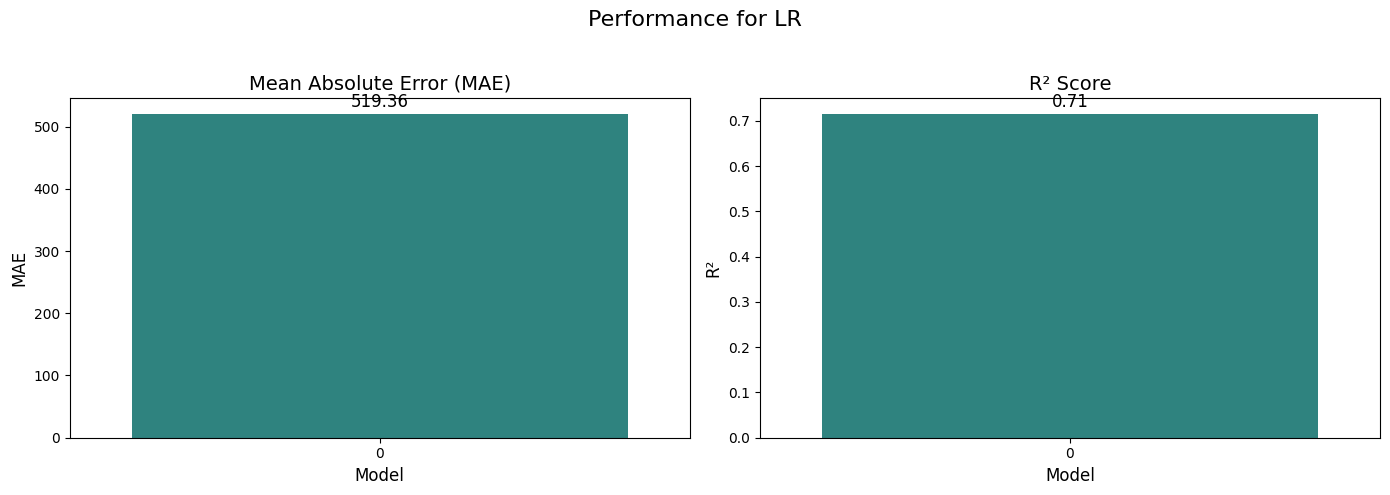

C:\Users\Administrateur\AppData\Local\Temp\ipykernel_18484\457679192.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loaded_report.index, y='best_mae', data=loaded_report, ax=ax[0], palette='viridis')
C:\Users\Administrateur\AppData\Local\Temp\ipykernel_18484\457679192.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loaded_report.index, y='best_r2', data=loaded_report, ax=ax[1], palette='viridis')


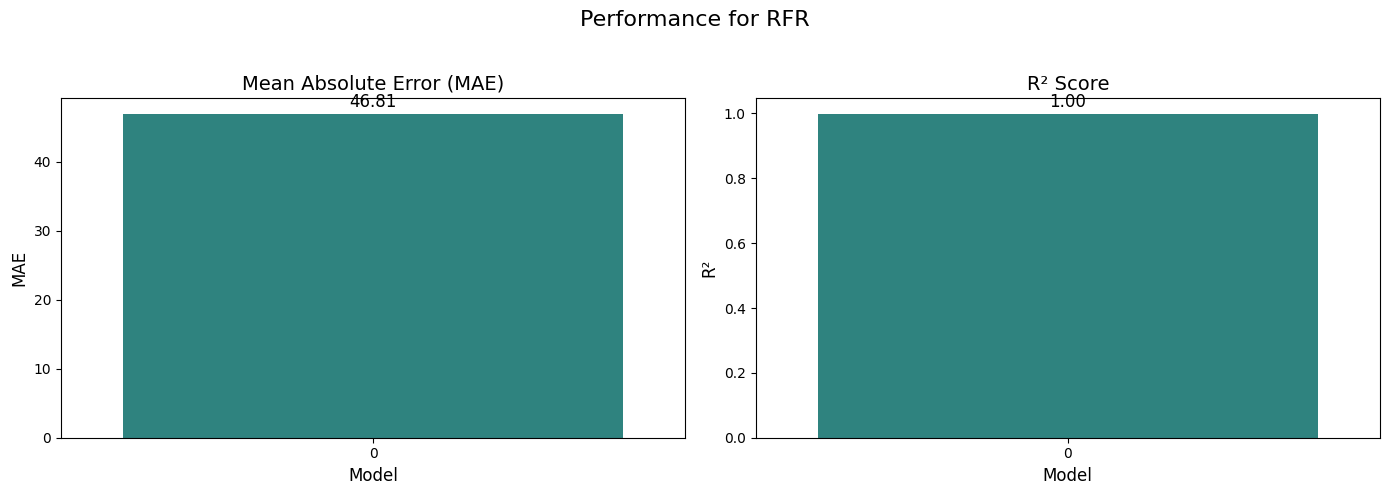

C:\Users\Administrateur\AppData\Local\Temp\ipykernel_18484\457679192.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loaded_report.index, y='best_mae', data=loaded_report, ax=ax[0], palette='viridis')
C:\Users\Administrateur\AppData\Local\Temp\ipykernel_18484\457679192.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loaded_report.index, y='best_r2', data=loaded_report, ax=ax[1], palette='viridis')


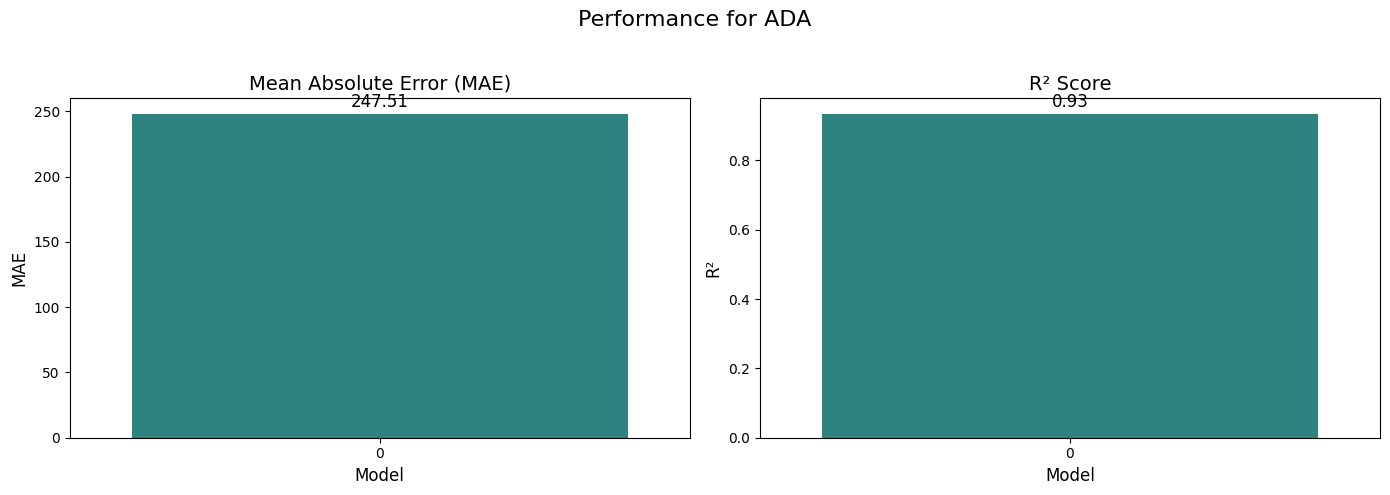

C:\Users\Administrateur\AppData\Local\Temp\ipykernel_18484\457679192.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loaded_report.index, y='best_mae', data=loaded_report, ax=ax[0], palette='viridis')
C:\Users\Administrateur\AppData\Local\Temp\ipykernel_18484\457679192.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loaded_report.index, y='best_r2', data=loaded_report, ax=ax[1], palette='viridis')


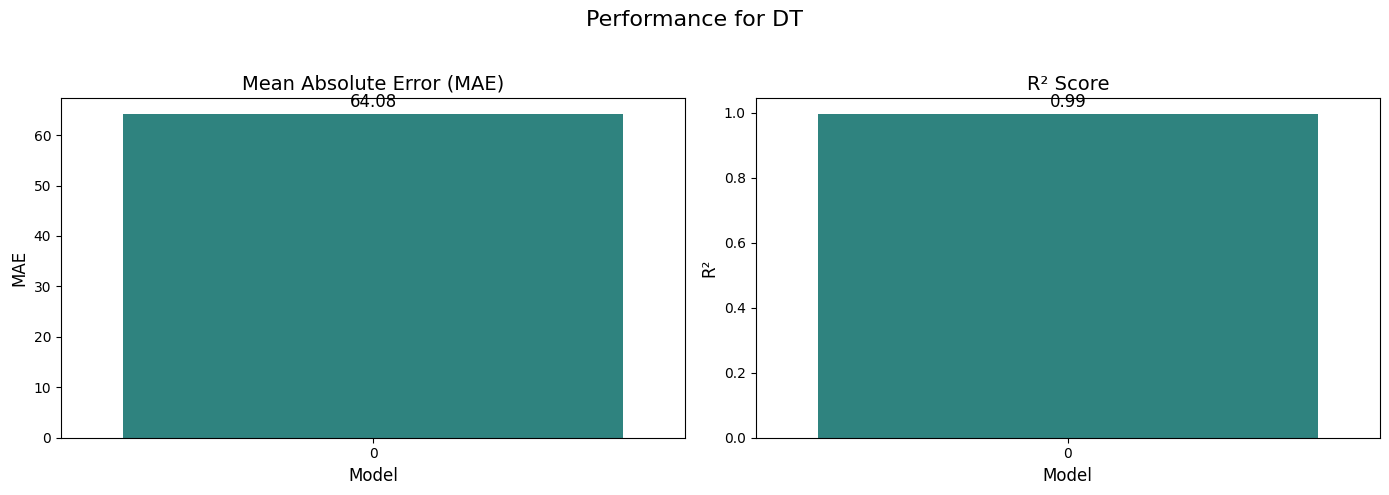

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



pipeline_params = {
    'LR':{
        'pipeline': pipeline_LF1,
        'params': S_hyperparameters_LR
    },
    
    
    'RFR':{
        'pipeline': pipeline_RFR1,
        'params' : S_hyperparameters_RFR
    },
    
    'ADA': {
        'pipeline': pipeline_ADA1,
        'params': S_hyperparameters_ADA
    },
    
    'DT': {
        'pipeline': pipeline_DT,
        'params': S_hyperparameters_DT
    }
    
    
}



for name, pipeline_info in pipeline_params.items():
    loaded_report = pd.read_pickle(f"regression_{name}res_report.pkl")
    
    loaded_report = loaded_report.drop_duplicates()

    fig, ax = plt.subplots(1, 2, figsize=(14, 5))
    fig.suptitle(f"Performance for {name}", fontsize=16)
    
    sns.barplot(x=loaded_report.index, y='best_mae', data=loaded_report, ax=ax[0], palette='viridis')
    ax[0].set_title('Mean Absolute Error (MAE)', fontsize=14)
    ax[0].set_xlabel('Model', fontsize=12)
    ax[0].set_ylabel('MAE', fontsize=12)
    
    for p in ax[0].patches:
        ax[0].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontsize=12)
    
    sns.barplot(x=loaded_report.index, y='best_r2', data=loaded_report, ax=ax[1], palette='viridis')
    ax[1].set_title('R² Score', fontsize=14)
    ax[1].set_xlabel('Model', fontsize=12)
    ax[1].set_ylabel('R²', fontsize=12)
    
    for p in ax[1].patches:
        ax[1].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontsize=12)
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()



##### Sauvegarde en csv